# <center>Diversity of Music Consumption across Countries - Spotify<center>

-------
# Table of Contents

1. [Preliminary Analysis](#Preliminary-Analysis)
2. [Country Pairs](#Country-Pairs)
4. [Culture](#Culture)
5. [Language](#Language)
6. [Social Distance](#Social-Distance)
7. [Home Bias](#Home-Bias)
8. [Gravity Model](#Gravity-Model)

-----

# Preliminary Analysis

- Data from 2017-01-01 to 2021-06-28
- Release Years: 2017, 2018, 2019, 2020, 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

os.chdir('/Users/sunnihermann/Desktop/')
print(os.getcwd())

/Users/sunnihermann/Desktop


In [2]:
spotify_chart = pd.read_csv('MasterThesis/sportify_chart.csv')

In [3]:
test = spotify_chart.loc[spotify_chart.year == 2018]

In [4]:
test.date.nunique()

365

In [5]:
print(spotify_chart.shape)
spotify_chart.columns.values

(16189134, 26)


array(['Unnamed: 0', 'Position', 'Track Name', 'Artist', 'Streams', 'URL',
       'date', 'country', 'artists', 'id', 'external_urls_spotify',
       'external_ids_isrc', 'issue_country', 'year', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'], dtype=object)

In [6]:
spotify_chart = spotify_chart.drop(columns='Unnamed: 0')

In [7]:
spotify_chart.head(1)

Position Track Name     Artist  Streams  \
0         1     DÁKITI  Bad Bunny   101645   

                                                 URL        date country  \
0  https://open.spotify.com/track/4MzXwWMhyBbmu6h...  2021-02-08      co   

                                             artists                      id  \
0  [{'external_urls': {'spotify': 'https://open.s...  4MzXwWMhyBbmu6hOcLVD49   

                               external_urls_spotify  ...  key loudness  mode  \
0  https://open.spotify.com/track/4MzXwWMhyBbmu6h...  ...  4.0  -10.059   0.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0544         0.401          0.000052     0.113    0.145  109.928   

   time_signature  
0             4.0  

[1 rows x 25 columns]

In [8]:
spotify_chart.isnull().sum()
#Null values Track Name & Artist do not matter for us as only Streams/country/... are relevant variables

Position                   0
Track Name                17
Artist                     6
Streams                    0
URL                        0
date                       0
country                    0
artists                    0
id                         0
external_urls_spotify      0
external_ids_isrc          0
issue_country              0
year                       0
danceability             296
energy                   296
key                      296
loudness                 296
mode                     296
speechiness              296
acousticness             296
instrumentalness         296
liveness                 296
valence                  296
tempo                    296
time_signature           296
dtype: int64

In [9]:
#Data from 01.01.2017 - 28.06.2021
print(spotify_chart.date.min())
print(spotify_chart.date.max())

print("\n Release Years:")
spotify_chart.year.value_counts()

2017-01-01
2021-06-28

 Release Years:


2020    4082118
2019    3921460
2018    3256289
2017    2690243
2021    2239024
Name: year, dtype: int64

In [10]:
print(spotify_chart.Position.min())
print(spotify_chart.Position.max())

1
200


In [11]:
spotify_chart['date'] = pd.to_datetime(spotify_chart['date'], format='%Y-%m-%d')

In [12]:
spotify_chart['country'] = spotify_chart['country'].str.upper()
print(spotify_chart.country.nunique())

69


In [13]:
spotify_chart.country.unique()

array(['CO', 'AE', 'BR', 'US', 'CA', 'CR', 'BG', 'DK', 'AR', 'AT', 'BO',
       'CL', 'DO', 'AU', 'CH', 'BE', 'EC', 'DE', 'ZA', 'MX', 'PT', 'NL',
       'PY', 'MY', 'UA', 'PE', 'SG', 'SK', 'SV', 'MA', 'PA', 'RO', 'UY',
       'NI', 'SE', 'TW', 'NO', 'SA', 'RU', 'FI', 'IL', 'KR', 'IS', 'IE',
       'FR', 'GR', 'HK', 'IT', 'ES', 'IN', 'EE', 'GT', 'LV', 'EG', 'HU',
       'LU', 'LT', 'HN', 'CZ', 'GB', 'NZ', 'PL', 'TR', 'TH', 'VN', 'PH',
       'ID', 'JP', 'AL'], dtype=object)

In [38]:
total_streams = spotify_chart.Streams.sum()
total_streams

673435515940

In [43]:
top_artists = spotify_chart.groupby(['Artist', 'issue_country'])['Streams'].sum().sort_values(ascending=False)[:10]
top_artists = top_artists.to_frame()
top_artists.rename(columns={'issue_country': 'Country of Origin'}, inplace=True)
top_artists.rename(columns={'Streams': 'Total Streams'}, inplace=True)
top_artists = top_artists.reset_index()
top_artists

Artist issue_country  Total Streams
0       Post Malone            US    17748080008
1        Ed Sheeran            GB    15373631355
2             Drake            US    11830261104
3      XXXTENTACION            US     9783243148
4     Ariana Grande            US     8219158055
5         Bad Bunny            US     7541015081
6     Billie Eilish            US     7347984152
7        Juice WRLD            US     6845549235
8          Dua Lipa            GB     6745292050
9  The Chainsmokers            US     6684229741

In [46]:
top_artists.rename(columns={'Country of Origin': 'Country of Production'}, inplace=True)
top_artists

Artist Country of Production  Total Streams
0       Post Malone                    US    17748080008
1        Ed Sheeran                    GB    15373631355
2             Drake                    US    11830261104
3      XXXTENTACION                    US     9783243148
4     Ariana Grande                    US     8219158055
5         Bad Bunny                    US     7541015081
6     Billie Eilish                    US     7347984152
7        Juice WRLD                    US     6845549235
8          Dua Lipa                    GB     6745292050
9  The Chainsmokers                    US     6684229741

In [39]:
final = pd.read_csv('df_final.csv')
final.head()
us = final.loc[final.issue_country == 'US']
us_streams = us.Streams.sum()


total_streams = final.Streams.sum()
total_streams

671516285867

In [41]:
us_share_total_streams = us_streams/total_streams
us_share_total_streams

0.6111471157101357

In [ ]:
us_streams/

-----

# Country Pairs

### Getting the issuing country of the song

In [15]:
#ISCR format first 2 digits is the country code
spotify_chart['issue_country'] = spotify_chart['external_ids_isrc'].str[:2]
spotify_chart['issue_country'] = spotify_chart['issue_country'].str.upper()

In [16]:
spotify_chart['issue_country'].unique()

array(['QM', 'US', 'QZ', 'MX', 'GB', 'UY', 'DE', 'ES', 'AR', 'CY', 'CO',
       'RU', 'FR', 'KR', 'ZA', 'UK', 'CA', 'BR', 'SE', 'BX', 'NL', 'CH',
       'NO', 'IE', 'BG', 'BE', 'IT', 'AU', 'NZ', 'JP', 'FI', 'IL', 'CZ',
       'DK', 'AT', 'RO', 'GM', 'TR', 'PT', 'UA', 'LB', 'PH', 'AE', 'IN',
       'EG', 'SK', 'PL', 'BC', 'IS', 'EE', 'GR', 'FX', 'MT', 'AZ', 'HK',
       'XK', 'CN', 'TW', 'ID', 'MY', 'SG', 'DO', 'CL', 'DG', 'LV', 'JM',
       'GX', 'PE', 'RS', 'AL', 'AF', 'HU', 'AM', 'LT', 'SM', 'TH', 'XX',
       'PY', 'VN', 'VG', 'DZ', 'NG', 'PA', 'BH', 'NK', 'CB', 'KS', 'SI',
       'HR', 'CI', 'VA', 'VE', 'PK', 'BD', 'GT', 'QP', 'MR', 'T-'],
      dtype=object)

In [17]:
spotify_chart.loc[spotify_chart['issue_country']=='QM', 'issue_country'] = 'US'
spotify_chart.loc[spotify_chart['issue_country']=='QZ', 'issue_country'] = 'US'
spotify_chart.loc[spotify_chart['issue_country']=='UK', 'issue_country'] = 'GB'
spotify_chart.loc[spotify_chart['issue_country']=='GX', 'issue_country'] = 'GB'
spotify_chart.loc[spotify_chart['issue_country']=='KS', 'issue_country'] = 'KR'
spotify_chart.loc[spotify_chart['issue_country']=='FX', 'issue_country'] = 'FR'
spotify_chart.loc[spotify_chart['issue_country']=='CB', 'issue_country'] = 'CA'
spotify_chart.loc[spotify_chart['issue_country']=='FX', 'issue_country'] = 'FR'
spotify_chart.loc[spotify_chart['issue_country']=='BP', 'issue_country'] = 'BR'
spotify_chart.loc[spotify_chart['issue_country']=='BX', 'issue_country'] = 'BR'
spotify_chart.loc[spotify_chart['issue_country']=='BC', 'issue_country'] = 'BR'
spotify_chart.loc[spotify_chart['issue_country']=='T-', 'issue_country'] = 'TW'
spotify_chart = spotify_chart.loc[(spotify_chart['issue_country']!='XX')]

In [30]:
spotify_chart

Position                Track Name             Artist  Streams  \
0                1                    DÁKITI          Bad Bunny   101645   
1                2                    DÁKITI          Bad Bunny    74392   
2                2                    DÁKITI          Bad Bunny    98128   
3                1                    DÁKITI          Bad Bunny   116013   
4                9                    DÁKITI          Bad Bunny    70246   
...            ...                       ...                ...      ...   
16189129       198                    Taguan           John Roa    20766   
16189130       168                Takipsilim          Autotelic    26482   
16189131       175                Sa Kahapon       IV Of Spades    22949   
16189132       194  Superman (It's Not Easy)  Five For Fighting    18632   
16189133       170                Gusto Kita    Angeline Quinto    19802   

                                                        URL       date  \
0         https://open.spotify.com/track/4MzXwWMhyBbmu6h... 2021-02-08   
1         https://open.spotify.com/track/4MzXwWMhyBbmu6h... 2021-04-18   
2         https://open.spotify.com/track/4MzXwWMhyBbmu6h... 2021-03-04   
3         https://open.spotify.com/track/4MzXwWMhyBbmu6h... 2021-01-27   
4         https://open.spotify.com/track/4MzXwWMhyBbmu6h... 2021-06-03   
...                                                     ...        ...   
16189129  https://open.spotify.com/track/5CBp1DpEIdw76H1... 2018-08-20   
16189130  https://open.spotify.com/track/2lTCcfrukFA5bQ9... 2018-06-29   
16189131  https://open.spotify.com/track/0X4Pvds8O09aUNV... 2018-09-21   
16189132  https://open.spotify.com/track/3FvCy00Wz75Hmhl... 2017-08-14   
16189133  https://open.spotify.com/track/6VeOvyaMBynIqMS... 2017-03-08   

         country                                            artists  \
0             CO  [{'external_urls': {'spotify': 'https://open.s...   
1             CO  [{'external_urls': {'spotify': 'https://open.s...   
2             CO  [{'external_urls': {'spotify': 'https://open.s...   
3             CO  [{'external_urls': {'spotify': 'https://open.s...   
4             CO  [{'external_urls': {'spotify': 'https://open.s...   
...          ...                                                ...   
16189129      PH  [{'external_urls': {'spotify': 'https://open.s...   
16189130      PH  [{'external_urls': {'spotify': 'https://open.s...   
16189131      PH  [{'external_urls': {'spotify': 'https://open.s...   
16189132      PH  [{'external_urls': {'spotify': 'https://open.s...   
16189133      PH  [{'external_urls': {'spotify': 'https://open.s...   

                              id  \
0         4MzXwWMhyBbmu6hOcLVD49   
1         4MzXwWMhyBbmu6hOcLVD49   
2         4MzXwWMhyBbmu6hOcLVD49   
3         4MzXwWMhyBbmu6hOcLVD49   
4         4MzXwWMhyBbmu6hOcLVD49   
...                          ...   
16189129  5CBp1DpEIdw76H1Ol5SXUK   
16189130  2lTCcfrukFA5bQ9bpJkNNG   
16189131  0X4Pvds8O09aUNVzHMFc7c   
16189132  3FvCy00Wz75HmhlXPMmnOx   
16189133  6VeOvyaMBynIqMSY5uZpfx   

                                      external_urls_spotify  ...  key  \
0         https://open.spotify.com/track/4MzXwWMhyBbmu6h...  ...  4.0   
1         https://open.spotify.com/track/4MzXwWMhyBbmu6h...  ...  4.0   
2         https://open.spotify.com/track/4MzXwWMhyBbmu6h...  ...  4.0   
3         https://open.spotify.com/track/4MzXwWMhyBbmu6h...  ...  4.0   
4         https://open.spotify.com/track/4MzXwWMhyBbmu6h...  ...  4.0   
...                                                     ...  ...  ...   
16189129  https://open.spotify.com/track/5CBp1DpEIdw76H1...  ...  4.0   
16189130  https://open.spotify.com/track/2lTCcfrukFA5bQ9...  ...  4.0   
16189131  https://open.spotify.com/track/0X4Pvds8O09aUNV...  ...  0.0   
16189132  https://open.spotify.com/track/3FvCy00Wz75Hmhl...  ...  0.0   
16189133  https://open.spotify.com/track/6VeOvyaMBynIqMS...  ...  9.0   

         loudness  mode  speechiness  acousti

In [18]:
print('Issue country unique: ', spotify_chart['issue_country'].nunique())
print('Country unique: ', spotify_chart['country'].nunique())
print(spotify_chart['issue_country'].isnull().sum())

Issue country unique:  87
Country unique:  69
0


In [19]:
#issuing countries most often in the charts of other countries
spotify_chart.groupby(['issue_country'])['URL'].count().sort_values(ascending=False)[:5]

issue_country
US    9006410
GB    1732700
FR     566965
DE     545287
NL     313231
Name: URL, dtype: int64

In [ ]:
#only top 50 charts
top_50 = spotify_chart.loc[spotify_chart.Position <= 50]
top_50.to_csv("top_50.csv")

In [24]:
print(spotify_chart.shape)
print(top_50.shape)

(16189131, 25)
(4391938, 25)


------
### Country-pairs without years

In [20]:
#Counting the Song Chart survival days
country_pairs = spotify_chart.groupby(['country', 'issue_country'])['URL'].count().reset_index()
print(country_pairs.shape)
country_pairs.head()

(2086, 3)


country issue_country  URL
0      AE            AE  834
1      AE            AU  277
2      AE            CA  559
3      AE            CH   69
4      AE            CY  225

In [21]:
#Sum of Streams
country_pairs_streams = spotify_chart.groupby(['country', 'issue_country'])['Streams'].sum().reset_index()

country_pairs = country_pairs.merge(country_pairs_streams, on=['country', 'issue_country'])
print(country_pairs.shape)
country_pairs.head()

(2086, 4)


country issue_country  URL  Streams
0      AE            AE  834  1322069
1      AE            AU  277   373602
2      AE            CA  559   793472
3      AE            CH   69    88315
4      AE            CY  225   662940

In [22]:
#Deleting no market countries 
no_market_country = set(list(country_pairs.issue_country.unique())) - set(list(country_pairs.country.unique()))
#remaining are the countries where songs are produced that are no where in the charts
country_pairs = country_pairs.loc[~country_pairs['issue_country'].isin(no_market_country)] 
# ~ means NOT --> deleting no_market_countries from the country pairs, as they are not relevant

In [23]:
country_pairs.shape

(1842, 4)

In [24]:
print('Issue country unique: ', country_pairs['issue_country'].nunique())
print('Country unique: ', country_pairs['country'].nunique())

Issue country unique:  60
Country unique:  69


In [25]:
country_pairs_no_mutual = country_pairs.loc[country_pairs['country'] != country_pairs['issue_country']]
country_pairs_no_mutual.shape

(1783, 4)

------
### Now with 'years'

In [31]:
country_pairs_year = spotify_chart.groupby(['country', 'issue_country', 'year'])['URL'].count().reset_index()
print(country_pairs_year.shape)
country_pairs_year.head()

(6195, 4)


country issue_country  year  URL
0      AE            AE  2019  354
1      AE            AE  2020  399
2      AE            AE  2021   81
3      AE            AU  2019    1
4      AE            AU  2020  219

In [32]:
country_pairs_year_streams = spotify_chart.groupby(['country', 'issue_country', 'year'])['Streams'].sum().reset_index()

country_pairs_year = country_pairs_year.merge(country_pairs_year_streams, on=['country', 'issue_country', 'year'])
print(country_pairs_year.shape)
country_pairs_year.head()

(6195, 5)


country issue_country  year  URL  Streams
0      AE            AE  2019  354   558523
1      AE            AE  2020  399   648159
2      AE            AE  2021   81   115387
3      AE            AU  2019    1     1060
4      AE            AU  2020  219   298271

In [34]:
no_market_country = set(list(country_pairs_year.issue_country.unique())) - set(list(country_pairs_year.country.unique()))
country_pairs_year = country_pairs_year.loc[~country_pairs_year['issue_country'].isin(no_market_country)]

#country_pairs_year = country_pairs_year.loc[country_pairs_year['country']!='GB']
#country_pairs_year = country_pairs_year.loc[country_pairs_year['country']!='LU']
print(country_pairs_year.shape)

(5616, 5)


In [35]:
country_pairs_year = country_pairs_year.reset_index()
country_pairs_year = country_pairs_year.drop(columns={'index'})

In [36]:
#country_pairs_year.loc[country_pairs_year['country']=='UK', 'country'] = 'GB'
#country_pairs_year.loc[country_pairs_year['issue_country']=='UK', 'issue_country'] = 'GB'

In [37]:
print(country_pairs_year.shape)
print(country_pairs_year.country.nunique())
print(country_pairs_year.issue_country.nunique())

(5616, 5)
69
60


In [42]:
country_pairs_year.Streams.sum()

671516285867

In [148]:
country_pairs_year.to_csv('country_pairs_year.csv')

In [149]:
country_pairs_no_mutual_year = country_pairs_year.loc[country_pairs_year['country'] != country_pairs_year['issue_country']]
country_pairs_no_mutual_year.shape

(5355, 5)

In [150]:
print(country_pairs_year.shape)
print(country_pairs.shape)

(5616, 5)
(1842, 4)


------
# Exploring Final Dataset

In [2]:
final = pd.read_csv('df_final.csv')
final.head()

Unnamed: 0 country issue_country  year  chart_survival  Streams  \
0           0      AE            AE  2019             354   558523   
1           1      AE            AE  2020             399   648159   
2           2      AE            AE  2021              81   115387   
3           3      AE            AU  2019               1     1060   
4           4      AE            AU  2020             219   298271   

  country_language issue_country_language  common_language   dist_social  \
0           ['ar']                 ['ar']                1  8.951117e-07   
1           ['ar']                 ['ar']                1  8.951117e-07   
2           ['ar']                 ['ar']                1  8.951117e-07   
3           ['ar']                 ['en']                0  8.381527e-05   
4           ['ar']                 ['en']                0  8.381527e-05   

  country_iso3 issue_country_iso3  dist_cultural   dist_geo   dist_eco  \
0          ARE                ARE       0.000000    108.789        NaN   
1          ARE                ARE       0.000000    108.789        NaN   
2          ARE                ARE       0.000000    108.789        NaN   
3          ARE                AUS       4.186266  11962.663  28.932136   
4          ARE                AUS       4.186266  11962.663        NaN   

   home_bias  
0          1  
1          1  
2          1  
3          0  
4          0

In [3]:
final.chart_survival.sum()

16110739

In [ ]:
top_artists = final.groupby('artist')['Streams'].sum().sort_values(ascending=False)[:10]
top_artists = top_artists.to_frame()
top_artists = top_artists.reset_index()
top_artists

In [4]:
top_exporteurs = final.groupby('issue_country')['Streams'].sum().sort_values(ascending=False)[:10]
top_exporteurs = top_exporteurs.to_frame()
top_exporteurs = top_exporteurs.reset_index()
top_exporteurs

issue_country       Streams
0            US  410395241260
1            GB   73087589209
2            BR   32410579103
3            DE   27470833231
4            FR   21564470945
5            IT   15147776571
6            NL   13455134441
7            SE   11572008973
8            MX    7525618271
9            ES    6364977172

In [5]:
top_exporteurs.Streams = top_exporteurs.Streams/top_exporteurs.Streams.sum()
top_exporteurs

issue_country   Streams
0            US  0.663003
1            GB  0.118075
2            BR  0.052360
3            DE  0.044380
4            FR  0.034838
5            IT  0.024472
6            NL  0.021737
7            SE  0.018695
8            MX  0.012158
9            ES  0.010283

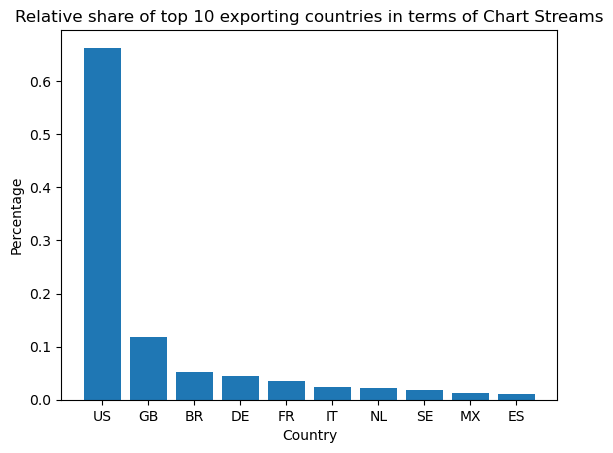

In [6]:
# Create bars
plt.bar(top_exporteurs.issue_country, top_exporteurs.Streams)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Relative share of top 10 exporting countries in terms of Chart Streams')
plt.show()

In [7]:
country_pairs_no_mutual_year = country_pairs_year.loc[country_pairs_year['country'] != country_pairs_year['issue_country']]
country_pairs_no_mutual_year.shape

NameError: name 'country_pairs_year' is not defined

In [8]:
top_exporteurs = country_pairs_no_mutual_year.copy()

NameError: name 'country_pairs_no_mutual_year' is not defined

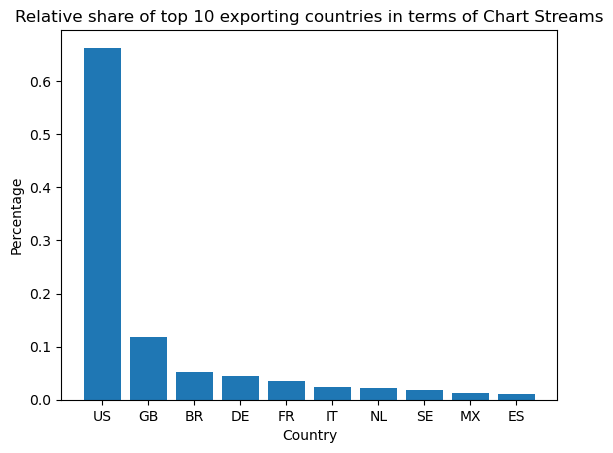

In [9]:
top_exporteurs = final.groupby('issue_country')['Streams'].sum().sort_values(ascending=False)[:10]
top_exporteurs = top_exporteurs.to_frame()
top_exporteurs = top_exporteurs.reset_index()
top_exporteurs.Streams = top_exporteurs.Streams/top_exporteurs.Streams.sum()

plt.bar(top_exporteurs.issue_country, top_exporteurs.Streams)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Relative share of top 10 exporting countries in terms of Chart Streams')
plt.show()

---------

## For Network Graph in Gephi

In [229]:
country_pairs_no_mutual.groupby('issue_country')['URL'].sum().sort_values(ascending=False)[:10]

issue_country
US    8738351
GB    1619018
DE     396933
FR     385797
MX     257592
NL     187054
SE     162295
KR     150320
ES     146601
TW      79548
Name: URL, dtype: int64

In [56]:
country_pairs_no_mutual.head(2)

country issue_country  URL  Streams
1      AE            AU  277   373602
2      AE            CA  559   793472

In [87]:
nodes = country_pairs_no_mutual.copy()

In [88]:
nodes.country.unique()

array(['AE', 'AL', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR', 'CA', 'CH',
       'CL', 'CO', 'CR', 'CZ', 'DE', 'DK', 'DO', 'EC', 'EE', 'EG', 'ES',
       'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL',
       'IN', 'IS', 'IT', 'JP', 'KR', 'LT', 'LU', 'LV', 'MA', 'MX', 'MY',
       'NI', 'NL', 'NO', 'NZ', 'PA', 'PE', 'PH', 'PL', 'PT', 'PY', 'RO',
       'RU', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TR', 'TW', 'UA', 'US',
       'UY', 'VN', 'ZA'], dtype=object)

In [89]:
western_europe = ['GB', 'ES', 'FR', 'AT', 'CH', 'DE', 'IT', 'NL', 'BE', 'NO', 'SK', 'IE', 'LU', 'PT',
                 'SE', 'DK', 'FI', 'IS']
eastern_europe = ['RU', 'BG', 'PL', 'EE', 'RO', 'UA', 'TR', 'HU', 'LT', 'LV', 'GR', 'CZ', 'AL']
#north_europe = ['SE', 'DK', 'FI', 'IS']
middle_east = ['AE', 'IL', 'SA']
north_america = ['CA', 'US']
australasian = ['AU', 'NZ']
central_southeast_america = ['MX', 'CR', 'DO', 'GT', 'HN', 'NI', 'PA', 'SV',
                            'AR', 'UY', 'BO', 'BR', 'CL', 'CO', 'EC', 'PE', 'PY']
africa = ['ZA', 'EG', 'MA']
southeast_asia = ['HK', 'IN', 'JP', 'KR', 'MY', 'TW', 'ID', 'SG', 'PH', 'TH', 'VN']

In [90]:
#region refers to region where music is consumed

nodes.loc[nodes['country'].isin(western_europe), 'region'] = 'Western Europe'
nodes.loc[nodes['country'].isin(eastern_europe), 'region'] = 'Eastern Europe'
nodes.loc[nodes['country'].isin(middle_east), 'region'] = 'Middle East'
nodes.loc[nodes['country'].isin(north_america), 'region'] = 'North America'
#nodes.locnodess['country'].isin(north_europe), 'region'] = 'North Europe'
#nodes.locnodess['country'].isin(south_america), 'region'] = 'South America'
nodes.loc[nodes['country'].isin(australasian), 'region'] = 'Australasian'
nodes.loc[nodes['country'].isin(central_southeast_america), 'region'] = 'Central South America'
nodes.loc[nodes['country'].isin(africa), 'region'] = 'Africa'
nodes.loc[nodes['country'].isin(southeast_asia), 'region'] = 'Southeast Asia'

In [91]:
print(nodes.country.nunique())
print(nodes.issue_country.nunique())

69
55


In [92]:
nodes = nodes[['country', 'region']].drop_duplicates()
nodes = nodes.set_index('country')

In [93]:
nodes.insert(0, 'Id', range(1, 70))

In [94]:
nodes=nodes.reset_index()
nodes = nodes[['Id', 'country', 'region']]
nodes.rename(columns={'country': 'Label'}, inplace=True)
#nodes = nodes.drop(columns='index')
nodes.head()

Id Label                 region
0   1    AE            Middle East
1   2    AL         Eastern Europe
2   3    AR  Central South America
3   4    AT         Western Europe
4   5    AU           Australasian

In [102]:
nodes.to_excel('nodes.xlsx')

In [127]:
nodes.to_csv('nodes.csv', index=False)

In [175]:
edges = country_pairs_no_mutual.copy()
print(edges.shape)
edges.head(2)

(1783, 5)


country issue_country  URL  Streams       region
1      AE            AU  277   373602  Middle East
2      AE            CA  559   793472  Middle East

In [176]:
edges.loc[edges['country'].isin(western_europe), 'region'] = 'Western Europe'
edges.loc[edges['country'].isin(eastern_europe), 'region'] = 'Eastern Europe'
edges.loc[edges['country'].isin(middle_east), 'region'] = 'Middle East'
edges.loc[edges['country'].isin(north_america), 'region'] = 'North America'
edges.loc[edges['country'].isin(australasian), 'region'] = 'Australasian'
edges.loc[edges['country'].isin(central_southeast_america), 'region'] = 'Central South America'
edges.loc[edges['country'].isin(africa), 'region'] = 'Africa'
edges.loc[edges['country'].isin(southeast_asia), 'region'] = 'Southeast Asia'

In [177]:
edges = edges.merge(nodes, how='left', left_on='issue_country', right_on='Label')
print(edges.shape)
edges.rename(columns={'Id': 'Source'}, inplace=True)

edges = edges.merge(nodes, how='left', left_on='country', right_on='Label')
print(edges.shape)
edges.rename(columns={'Id': 'Target'}, inplace=True)

edges.head(2)

(1783, 8)
(1783, 11)


country issue_country  URL  Streams     region_x  Source Label_x  \
0      AE            AU  277   373602  Middle East       5      AU   
1      AE            CA  559   793472  Middle East      10      CA   

        region_y  Target Label_y       region  
0   Australasian       1      AE  Middle East  
1  North America       1      AE  Middle East

In [178]:
edges['Type'] = 'Directed'
edges.rename(columns={'URL': 'Weight'}, inplace=True)
edges = edges[['Source', 'Target', 'Type', 'Weight', 'region']]
edges.head()

Source  Target      Type  Weight       region
0       5       1  Directed     277  Middle East
1      10       1  Directed     559  Middle East
2      11       1  Directed      69  Middle East
3      16       1  Directed    3058  Middle East
4      17       1  Directed     248  Middle East

In [179]:
edges = edges.reset_index(drop=True)
edges.head()

Source  Target      Type  Weight       region
0       5       1  Directed     277  Middle East
1      10       1  Directed     559  Middle East
2      11       1  Directed      69  Middle East
3      16       1  Directed    3058  Middle East
4      17       1  Directed     248  Middle East

In [185]:
edges.Weight.max()

248600

In [197]:
edges.Weight.count()

1783

In [222]:
new = edges[edges.Weight > edges.Weight.quantile(.25)]
new.Weight.count()

1335

In [214]:
new.Weight.min()

19

In [215]:
new

Source  Target      Type  Weight       region
0          5       1  Directed     277  Middle East
1         10       1  Directed     559  Middle East
2         11       1  Directed      69  Middle East
3         16       1  Directed    3058  Middle East
4         17       1  Directed     248  Middle East
...      ...     ...       ...     ...          ...
1777      46      69  Directed    2608       Africa
1778      47      69  Directed     401       Africa
1780      56      69  Directed     543       Africa
1781      58      69  Directed    2550       Africa
1782      66      69  Directed  133844       Africa

[1335 rows x 5 columns]

In [220]:
unique = new.Target.nunique()
unique

69

In [211]:
new.to_csv('new.csv', index=False)

In [196]:
#edges.Weight.plot(kind='kde')
#plt.xlim(0,248600)
#plt.ylim(0.8,1.4)
#plt.plot()

In [180]:
edges.to_excel('edges.xlsx')

In [181]:
edges.to_csv('edges.csv', index=False)

-------

In [151]:
country_pairs_no_mutual

country issue_country     URL    Streams
1         AE            AU     277     373602
2         AE            CA     559     793472
3         AE            CH      69      88315
5         AE            DE    3058    6457106
6         AE            DK     248     354564
...      ...           ...     ...        ...
2080      ZA            NO     401     616393
2081      ZA            NZ      13      54731
2082      ZA            RU     543    3421423
2083      ZA            SE    2550    4996704
2084      ZA            US  133844  411785805

[1783 rows x 4 columns]

In [152]:

country_pairs_no_mutual.loc[country_pairs_no_mutual['country'].isin(western_europe), 'region'] = 'Western Europe'
country_pairs_no_mutual.loc[country_pairs_no_mutual['country'].isin(eastern_europe), 'region'] = 'Eastern Europe'
country_pairs_no_mutual.loc[country_pairs_no_mutual['country'].isin(middle_east), 'region'] = 'Middle East'
country_pairs_no_mutual.loc[country_pairs_no_mutual['country'].isin(north_america), 'region'] = 'North America'
country_pairs_no_mutual.loc[country_pairs_no_mutual['country'].isin(australasian), 'region'] = 'Australasian'
country_pairs_no_mutual.loc[country_pairs_no_mutual['country'].isin(central_southeast_america), 'region'] = 'Central South America'
country_pairs_no_mutual.loc[country_pairs_no_mutual['country'].isin(africa), 'region'] = 'Africa'
country_pairs_no_mutual.loc[country_pairs_no_mutual['country'].isin(southeast_asia), 'region'] = 'Southeast Asia'

In [164]:
import networkx as nx

G = nx.from_pandas_edgelist(country_pairs_no_mutual, 'issue_country', 'country', 'URL', create_using=nx.DiGraph())
#(df, source='source', target='target', edge_attr=None, create_using=None, edge_key=None)

In [165]:
len(list(G.nodes()))

69

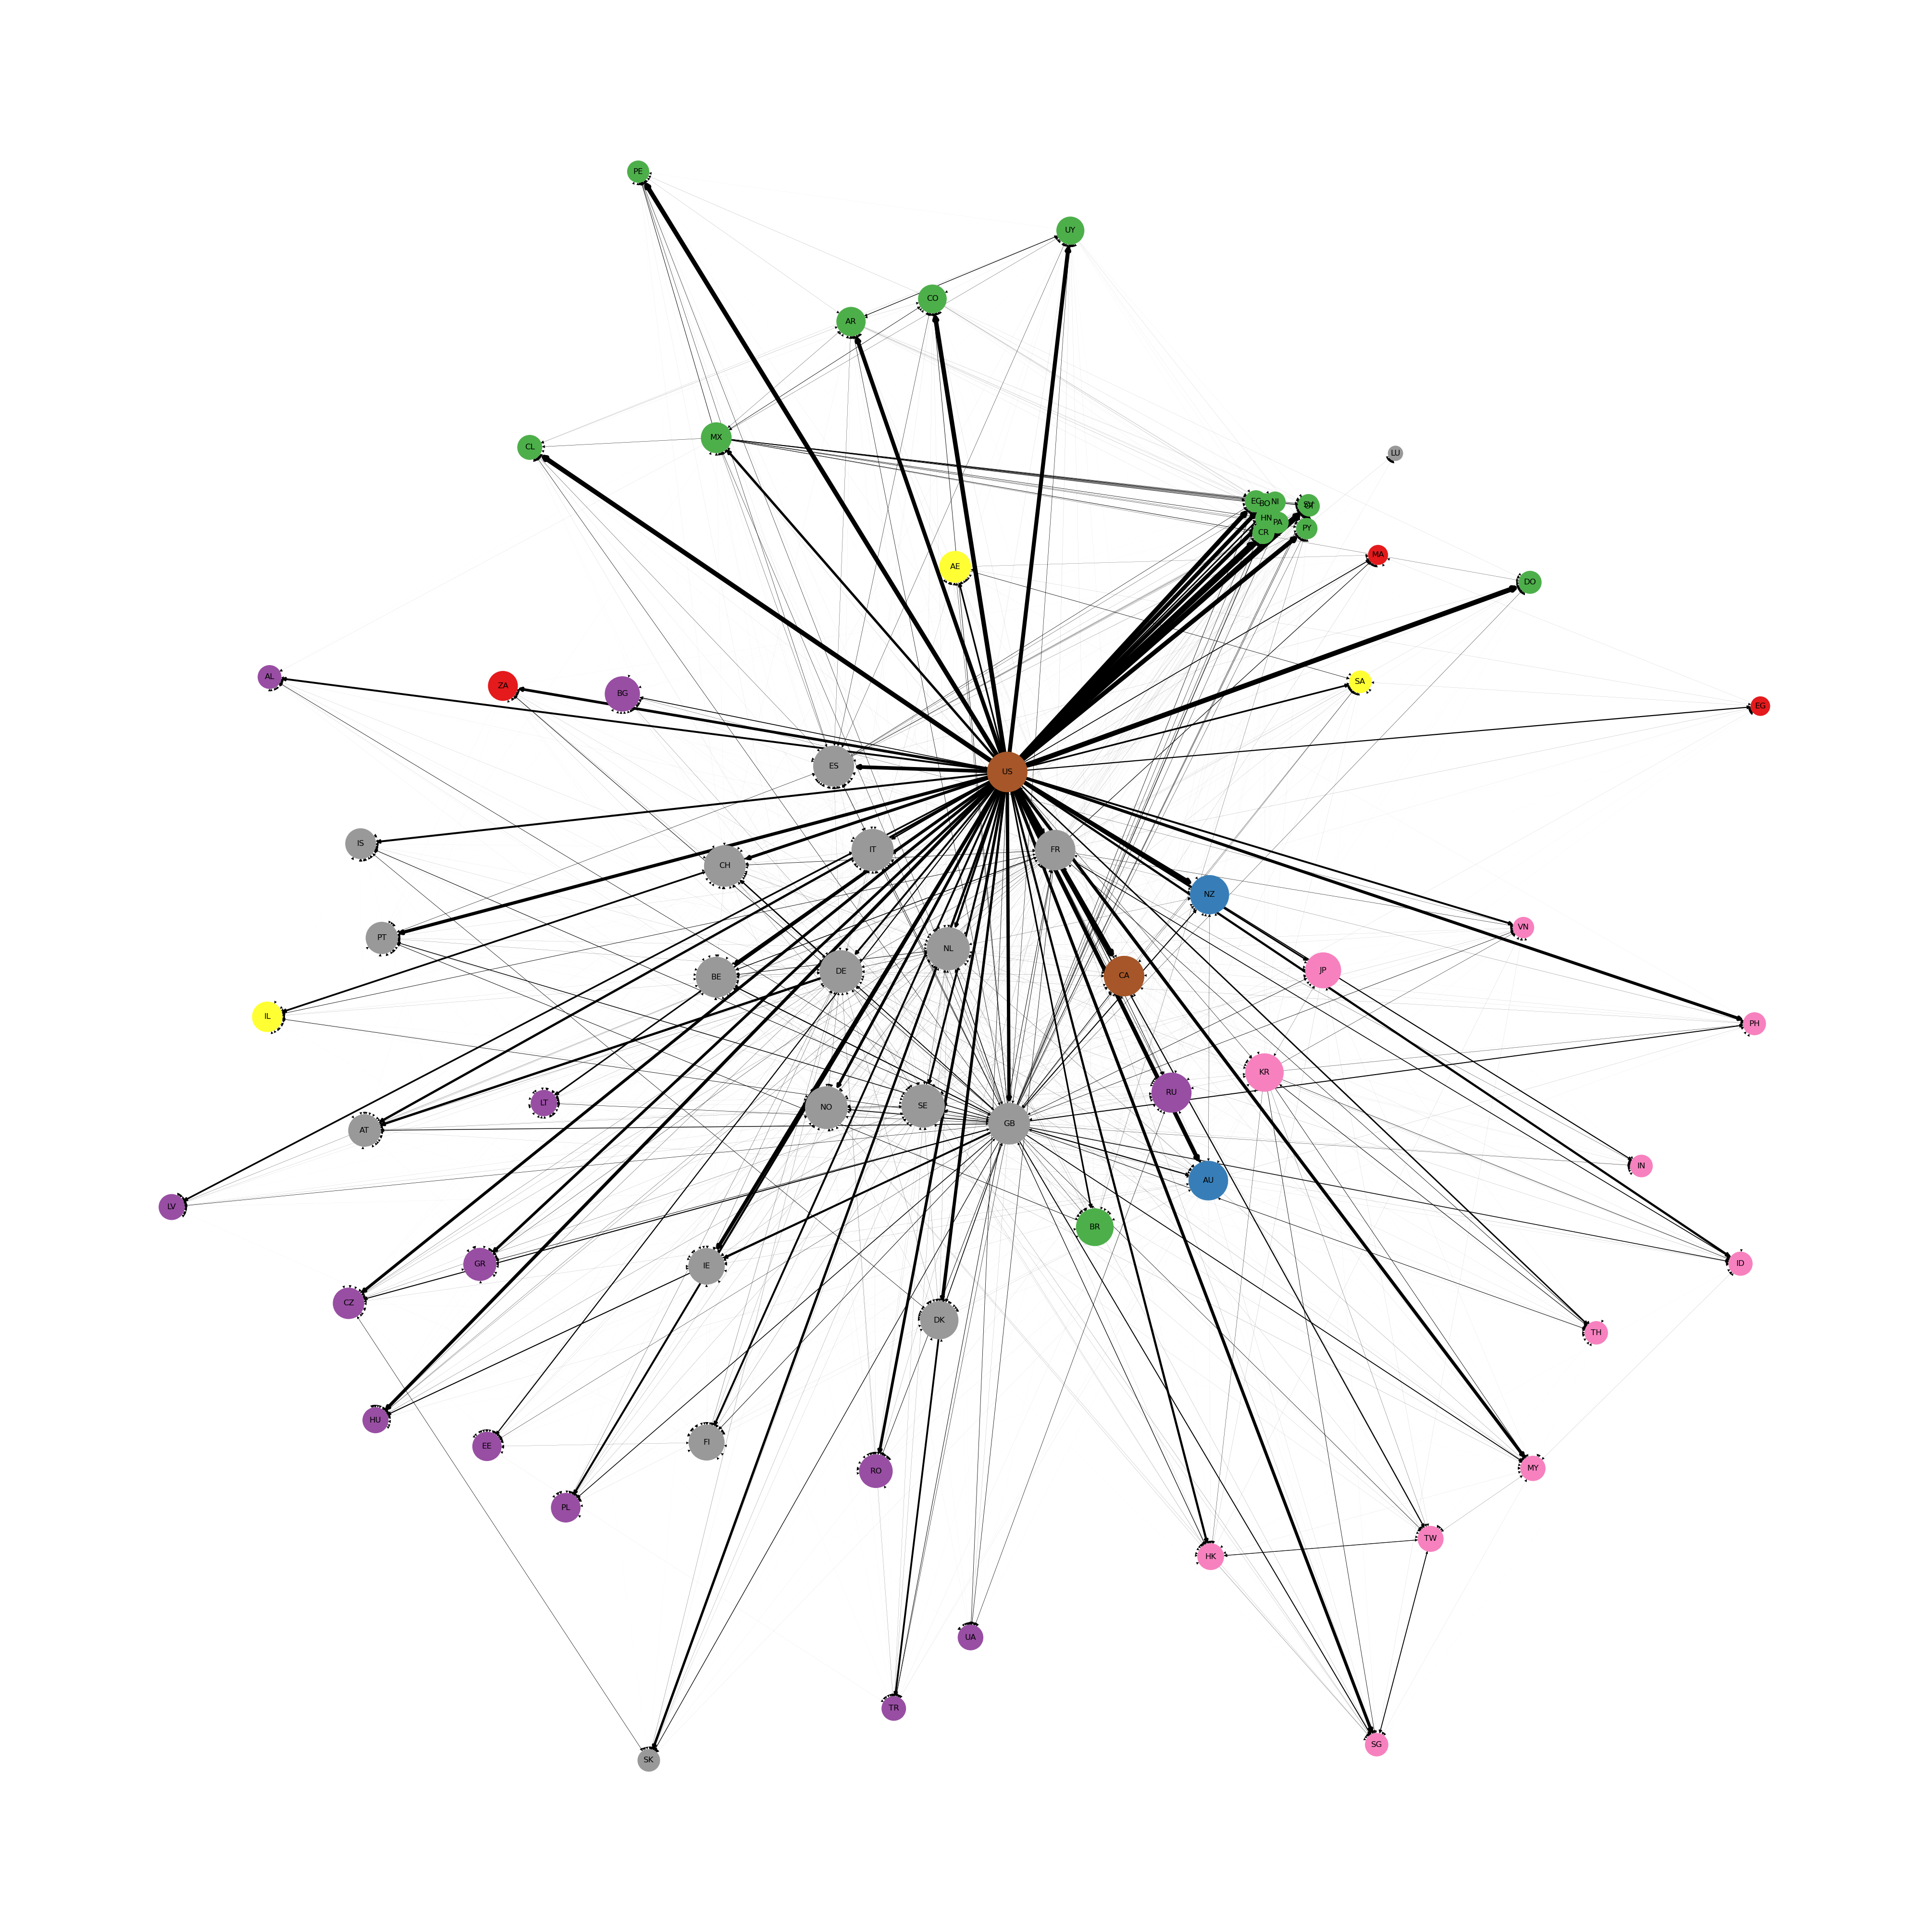

In [173]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(40,40))
options = {
    #'node_color': 'grey',
    #'node_size': 800,
    #'width': 1,
}

d = dict(G.degree)

pos = nx.fruchterman_reingold_layout(G) 
#pos: dictionary, optional --> A dictionary with nodes as keys and positions as values. 

cmap = cm.get_cmap('Set1', max(country_pairs_nodes['region'].cat.codes) + 1) #colormap
edges = G.edges()
weights = [0.00003*G[u][v]['URL'] for u, v in edges]

nx.draw_kamada_kawai(G, 
        with_labels=True, #to draw labels on the nodes
        font_weight=1, 
        node_size=[v*40 for v in d.values()], 
        width=weights,
        node_color=country_pairs_nodes['region'].cat.codes+1, 
        cmap=cmap
       )

#plt.legend(country_pairs_nodes['region'].unique(), fontsize=12)
#plt.legend(region, fontsize=12)
plt.show()
#plt.legend(loc='center')

------

# Culture

## --> Hofstede's Cultural Dimensions

**Hypotheses: The consumption of music is culturally shaped**

- music itself is a cultural good --> counties that are cultural similar should have similar taste if the culture is similar, easier to accept culture from other country beyond the language // culture forms similar taste (eg accept sth from the Netherland bc similar culture )


--> Supplement the dataset with Hofstede's cultural dimensions. Hofstede describes 6 comparison criteria that represent similarities and differences between cultures. Euclidean distance can be used as a measure of similarity between countries.

- *pdi = Power Distance*
- *idv = Individualism*
- *mas = Masculinity*
- *uai = Uncertainty Avoidance*
- *ltowvs = Long-Term Orientation*
- *ivr = Indulgence*

In [34]:
culture_countries = pd.read_csv('MasterThesis/6-dimensions-for-website-2015-08-16.csv', sep=';',
                               na_values='#NULL!')
culture_countries.head()

ctr      country   pdi   idv   mas   uai  ltowvs   ivr
0  AFE  Africa East  64.0  27.0  41.0  52.0    32.0  40.0
1  AFW  Africa West  77.0  20.0  46.0  54.0     9.0  78.0
2  ALB      Albania   NaN   NaN   NaN   NaN    61.0  15.0
3  ALG      Algeria   NaN   NaN   NaN   NaN    26.0  32.0
4  AND      Andorra   NaN   NaN   NaN   NaN     NaN  65.0

In [35]:
country_pairs_culture = country_pairs.copy()
print(country_pairs_culture.shape)
country_pairs_culture.head(3)

(1842, 4)


country issue_country  URL  Streams
0      AE            AE  834  1322069
1      AE            AU  277   373602
2      AE            CA  559   793472

In [70]:
#pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 12.8 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=ffc996f98d3b9d1481a7b5fabb8f48d7bff641240dac05ff36a7478b14eeb29a
  Stored in directory: /Users/sunnihermann/Library/Caches/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.


In [530]:
#Getting the full name COUNTRY
country_name = []

for country in country_pairs_culture['country']:
    country_name.append(get_country_name(country).name)
#country_name 

In [531]:
#Getting the full name ISSUE_COUNTRY
issue_country_name = []

for country in country_pairs_culture['issue_country']:
    issue_country_name.append(get_country_name(country).name)
#issue_country_name 

In [532]:
country_pairs_culture['issue_country_fullname'] = issue_country_name
country_pairs_culture['country_fullname'] = country_name
country_pairs_culture.head(3)

country issue_country  URL  Streams issue_country_fullname  \
0      AE            AE  834  1322069   United Arab Emirates   
1      AE            AU  277   373602              Australia   
2      AE            CA  559   793472                 Canada   

       country_fullname  
0  United Arab Emirates  
1  United Arab Emirates  
2  United Arab Emirates

In [533]:
culture_countries.head(3)

ctr      country   pdi   idv   mas   uai  ltowvs   ivr
0  AFE  Africa East  64.0  27.0  41.0  52.0    32.0  40.0
1  AFW  Africa West  77.0  20.0  46.0  54.0     9.0  78.0
2  ALB      Albania   NaN   NaN   NaN   NaN    61.0  15.0

In [534]:
print(country_pairs_culture.shape)
print(culture_countries.shape)

(1842, 6)
(111, 8)


In [535]:
#country_pairs_culture.country_fullname.unique()
#culture_countries.country.unique()

In [536]:
#Renaming country names in Hofstede Dataset so they match with spotify dataset

culture_countries.loc[culture_countries['country']=='Arab countries', 'country'] = 'United Arab Emirates'
culture_countries.loc[culture_countries['country']=='Belgium French', 'country'] = 'Belgium'
culture_countries.loc[culture_countries['country']=='Belgium Netherl', 'country'] = 'Belgium'
culture_countries.loc[culture_countries['country']=='Canada French', 'country'] = 'Canada'
culture_countries.loc[culture_countries['country']=='Czech Rep', 'country'] = 'Czechia'
culture_countries.loc[culture_countries['country']=='Dominican Rep', 'country'] = 'Dominican Republic'
culture_countries.loc[culture_countries['country']=='Germany East', 'country'] = 'Germany'
culture_countries.loc[culture_countries['country']=='Great Britain', 'country'] = 'United Kingdom'
culture_countries.loc[culture_countries['country']=='Korea South', 'country'] = 'Korea, Republic of'
culture_countries.loc[culture_countries['country']=='Russia', 'country'] = 'Russian Federation'
culture_countries.loc[culture_countries['country']=='Slovak Rep', 'country'] = 'Slovakia'
culture_countries.loc[culture_countries['country']=='South Africa white', 'country'] = 'South Africa'
culture_countries.loc[culture_countries['country']=='Switzerland French', 'country'] = 'Switzerland'
culture_countries.loc[culture_countries['country']=='Switzerland German', 'country'] = 'Switzerland'
culture_countries.loc[culture_countries['country']=='Taiwan', 'country'] = 'Taiwan, Province of China'
culture_countries.loc[culture_countries['country']=='U.S.A.', 'country'] = 'United States'
culture_countries.loc[culture_countries['country']=='Vietnam', 'country'] = 'Viet Nam'

In [537]:
####BELGIUM

In [538]:
culture_countries.loc[culture_countries['country']=='Belgium']

ctr  country   pdi   idv   mas   uai  ltowvs   ivr
13  BEL  Belgium  65.0  75.0  54.0  94.0    82.0  57.0
14  BEF  Belgium  67.0  72.0  60.0  93.0     NaN   NaN
15  BEN  Belgium  61.0  78.0  43.0  97.0     NaN   NaN

In [539]:
#Replace NaN with 0 
culture_countries.loc[culture_countries['ctr']=='BEF', 'ltowvs'] = 0
culture_countries.loc[culture_countries['ctr']=='BEF', 'ivr'] = 0
culture_countries.loc[culture_countries['ctr']=='BEN', 'ltowvs'] = 0
culture_countries.loc[culture_countries['ctr']=='BEN', 'ivr'] = 0
culture_countries.loc[culture_countries['country']=='Belgium']

ctr  country   pdi   idv   mas   uai  ltowvs   ivr
13  BEL  Belgium  65.0  75.0  54.0  94.0    82.0  57.0
14  BEF  Belgium  67.0  72.0  60.0  93.0     0.0   0.0
15  BEN  Belgium  61.0  78.0  43.0  97.0     0.0   0.0

In [540]:
#Summing Belgium up to one cell and deleting the other 2
belgium = culture_countries.loc[culture_countries['country']=='Belgium']

i = 2
while i <= 5:
    belgium.iloc[0,i] = sum(belgium.iloc[:,i])/3
    i += 1

belgium

ctr  country        pdi   idv        mas        uai  ltowvs   ivr
13  BEL  Belgium  64.333333  75.0  52.333333  94.666667    82.0  57.0
14  BEF  Belgium  67.000000  72.0  60.000000  93.000000     0.0   0.0
15  BEN  Belgium  61.000000  78.0  43.000000  97.000000     0.0   0.0

In [541]:
belgium = belgium.drop([14, 15])
culture_countries.loc[culture_countries['country']=='Belgium'] = belgium
culture_countries.loc[culture_countries['country']=='Belgium']

ctr  country        pdi   idv        mas        uai  ltowvs   ivr
13  BEL  Belgium  64.333333  75.0  52.333333  94.666667    82.0  57.0

In [542]:
####CANADA

In [543]:
culture_countries.loc[culture_countries['country']=='Canada']

ctr country   pdi   idv   mas   uai  ltowvs   ivr
20  CAN  Canada  39.0  80.0  52.0  48.0    36.0  68.0
21  CAF  Canada  54.0  73.0  45.0  60.0     NaN   NaN

In [544]:
culture_countries.loc[culture_countries['ctr']=='CAF', 'ltowvs'] = 0
culture_countries.loc[culture_countries['ctr']=='CAF', 'ivr'] = 0

In [545]:
#Summing Canada up to one cell
canada = culture_countries.loc[culture_countries['country']=='Canada']

i = 2
while i <= 5:
    canada.iloc[0,i] = sum(canada.iloc[:,i])/2
    i += 1

canada

ctr country   pdi   idv   mas   uai  ltowvs   ivr
20  CAN  Canada  46.5  76.5  48.5  54.0    36.0  68.0
21  CAF  Canada  54.0  73.0  45.0  60.0     0.0   0.0

In [546]:
canada = canada.drop([21])
culture_countries.loc[culture_countries['country']=='Canada'] = canada
culture_countries.loc[culture_countries['country']=='Canada']

ctr country   pdi   idv   mas   uai  ltowvs   ivr
20  CAN  Canada  46.5  76.5  48.5  54.0    36.0  68.0

In [547]:
####Germany

In [548]:
culture_countries.loc[culture_countries['country']=='Germany']

ctr  country   pdi   idv   mas   uai  ltowvs   ivr
39  GER  Germany  35.0  67.0  66.0  65.0    83.0  40.0
40  GEE  Germany   NaN   NaN   NaN   NaN    78.0  34.0

In [549]:
culture_countries.loc[culture_countries['ctr']=='GEE', 'pdi'] = 0
culture_countries.loc[culture_countries['ctr']=='GEE', 'idv'] = 0
culture_countries.loc[culture_countries['ctr']=='GEE', 'mas'] = 0
culture_countries.loc[culture_countries['ctr']=='GEE', 'uai'] = 0

In [550]:
#Summing Germany up to one cell
germany = culture_countries.loc[culture_countries['country']=='Germany']

i = 6
while i <= 7:
    germany.iloc[0,i] = sum(germany.iloc[:,i])/2
    i += 1

germany

ctr  country   pdi   idv   mas   uai  ltowvs   ivr
39  GER  Germany  35.0  67.0  66.0  65.0    80.5  37.0
40  GEE  Germany   0.0   0.0   0.0   0.0    78.0  34.0

In [551]:
germany = germany.drop([40])
culture_countries.loc[culture_countries['country']=='Germany'] = germany
culture_countries.loc[culture_countries['country']=='Germany']

ctr  country   pdi   idv   mas   uai  ltowvs   ivr
39  GER  Germany  35.0  67.0  66.0  65.0    80.5  37.0

In [552]:
####Switzerland

In [553]:
culture_countries.loc[culture_countries['country']=='Switzerland']

ctr      country   pdi   idv   mas   uai  ltowvs   ivr
95  SWI  Switzerland  34.0  68.0  70.0  58.0    74.0  66.0
96  SWF  Switzerland  70.0  64.0  58.0  70.0     NaN   NaN
97  SWG  Switzerland  26.0  69.0  72.0  56.0     NaN   NaN

In [554]:
culture_countries.loc[culture_countries['ctr']=='SWF', 'ltowvs'] = 0
culture_countries.loc[culture_countries['ctr']=='SWF', 'ivr'] = 0
culture_countries.loc[culture_countries['ctr']=='SWG', 'ltowvs'] = 0
culture_countries.loc[culture_countries['ctr']=='SWG', 'ivr'] = 0

In [555]:
#Summing Switzerland up to one cell
switzlerland = culture_countries.loc[culture_countries['country']=='Switzerland']

i = 2
while i <= 5:
    switzlerland.iloc[0,i] = sum(switzlerland.iloc[:,i])/3
    i += 1

switzlerland

ctr      country        pdi   idv        mas        uai  ltowvs   ivr
95  SWI  Switzerland  43.333333  67.0  66.666667  61.333333    74.0  66.0
96  SWF  Switzerland  70.000000  64.0  58.000000  70.000000     0.0   0.0
97  SWG  Switzerland  26.000000  69.0  72.000000  56.000000     0.0   0.0

In [556]:
switzlerland = switzlerland.drop([96,97])
culture_countries.loc[culture_countries['country']=='Switzerland'] = switzlerland
culture_countries.loc[culture_countries['country']=='Switzerland']

ctr      country        pdi   idv        mas        uai  ltowvs   ivr
95  SWI  Switzerland  43.333333  67.0  66.666667  61.333333    74.0  66.0

In [557]:
####South Africa

In [558]:
culture_countries.loc[culture_countries['country']=='South Africa']

ctr       country   pdi   idv   mas   uai  ltowvs   ivr
90  SAF  South Africa   NaN   NaN   NaN   NaN    34.0  63.0
91  SAW  South Africa  49.0  65.0  63.0  49.0     NaN   NaN

In [559]:
culture_countries.loc[culture_countries['ctr']=='SAF', 'pdi'] = 49.0
culture_countries.loc[culture_countries['ctr']=='SAF', 'idv'] = 65.0
culture_countries.loc[culture_countries['ctr']=='SAF', 'mas'] = 63.0
culture_countries.loc[culture_countries['ctr']=='SAF', 'uai'] = 49.0
#culture_countries.loc[culture_countries['ctr']=='SAW', 'ivr'] = 0
#culture_countries.loc[culture_countries['ctr']=='SAW', 'ivr'] = 0

In [560]:
culture_countries.loc[culture_countries['country']=='South Africa'] = culture_countries.loc[culture_countries['country']=='South Africa'].drop([91])
culture_countries.loc[culture_countries['country']=='South Africa']

ctr       country   pdi   idv   mas   uai  ltowvs   ivr
90  SAF  South Africa  49.0  65.0  63.0  49.0    34.0  63.0

------

In [561]:
#merging on COUNTRY FULL NAME with culture countries
country_pairs_culture = country_pairs_culture.merge(culture_countries, how = 'left', left_on='country_fullname', right_on='country')
country_pairs_culture.head(3)

country_x issue_country  URL  Streams issue_country_fullname  \
0        AE            AE  834  1322069   United Arab Emirates   
1        AE            AU  277   373602              Australia   
2        AE            CA  559   793472                 Canada   

       country_fullname  ctr             country_y   pdi   idv   mas   uai  \
0  United Arab Emirates  ARA  United Arab Emirates  80.0  38.0  53.0  68.0   
1  United Arab Emirates  ARA  United Arab Emirates  80.0  38.0  53.0  68.0   
2  United Arab Emirates  ARA  United Arab Emirates  80.0  38.0  53.0  68.0   

   ltowvs   ivr  
0    23.0  34.0  
1    23.0  34.0  
2    23.0  34.0

In [562]:
country_pairs_culture.shape

(1842, 14)

In [563]:
#merging with ISSUE COUNTRY FULL NAME cultural dimensions
country_pairs_culture = country_pairs_culture.merge(culture_countries, how='left', left_on='issue_country_fullname', right_on='country')
country_pairs_culture.head(3)

country_x issue_country  URL  Streams issue_country_fullname  \
0        AE            AE  834  1322069   United Arab Emirates   
1        AE            AU  277   373602              Australia   
2        AE            CA  559   793472                 Canada   

       country_fullname ctr_x             country_y  pdi_x  idv_x  ...  \
0  United Arab Emirates   ARA  United Arab Emirates   80.0   38.0  ...   
1  United Arab Emirates   ARA  United Arab Emirates   80.0   38.0  ...   
2  United Arab Emirates   ARA  United Arab Emirates   80.0   38.0  ...   

   ltowvs_x  ivr_x  ctr_y               country pdi_y idv_y  mas_y  uai_y  \
0      23.0   34.0    ARA  United Arab Emirates  80.0  38.0   53.0   68.0   
1      23.0   34.0    AUL             Australia  38.0  90.0   61.0   51.0   
2      23.0   34.0    CAN                Canada  46.5  76.5   48.5   54.0   

   ltowvs_y  ivr_y  
0      23.0   34.0  
1      21.0   71.0  
2      36.0   68.0  

[3 rows x 22 columns]

In [564]:
country_pairs_culture.shape
#now 22 columns bc we added cultural dimension of COUNTRY and ISSUE COUNTRY to calculate difference

(1842, 22)

In [565]:
country_pairs_culture.isnull().sum()

country_x                   0
issue_country               0
URL                         0
Streams                     0
issue_country_fullname      0
country_fullname            0
ctr_x                      97
country_y                  97
pdi_x                     252
idv_x                     252
mas_x                     252
uai_x                     252
ltowvs_x                  199
ivr_x                     226
ctr_y                       1
country                     1
pdi_y                      45
idv_y                      45
mas_y                      45
uai_y                      45
ltowvs_y                    3
ivr_y                      28
dtype: int64

In [566]:
#Calculating the differences between  Hofstede's cultural dimensions country - issue country
#How diffrent are the two countries that we look at?

country_pairs_culture['pdi_difference'] = np.abs(country_pairs_culture['pdi_x']- country_pairs_culture['pdi_y'])
country_pairs_culture['idv_difference'] = np.abs(country_pairs_culture['idv_x']- country_pairs_culture['idv_y'])
country_pairs_culture['mas_difference'] = np.abs(country_pairs_culture['mas_x']- country_pairs_culture['mas_y'])
country_pairs_culture['uai_difference'] = np.abs(country_pairs_culture['uai_x']- country_pairs_culture['uai_y'])
country_pairs_culture['ltowvs_difference'] = np.abs(country_pairs_culture['ltowvs_x']- country_pairs_culture['ltowvs_y'])
country_pairs_culture['ivr_difference'] = np.abs(country_pairs_culture['ivr_x']- country_pairs_culture['ivr_y'])

In [567]:
country_pairs_culture.head(3)

country_x issue_country  URL  Streams issue_country_fullname  \
0        AE            AE  834  1322069   United Arab Emirates   
1        AE            AU  277   373602              Australia   
2        AE            CA  559   793472                 Canada   

       country_fullname ctr_x             country_y  pdi_x  idv_x  ...  mas_y  \
0  United Arab Emirates   ARA  United Arab Emirates   80.0   38.0  ...   53.0   
1  United Arab Emirates   ARA  United Arab Emirates   80.0   38.0  ...   61.0   
2  United Arab Emirates   ARA  United Arab Emirates   80.0   38.0  ...   48.5   

   uai_y  ltowvs_y  ivr_y pdi_difference idv_difference  mas_difference  \
0   68.0      23.0   34.0            0.0            0.0             0.0   
1   51.0      21.0   71.0           42.0           52.0             8.0   
2   54.0      36.0   68.0           33.5           38.5             4.5   

   uai_difference  ltowvs_difference  ivr_difference  
0             0.0                0.0             0.0  
1            17.0                2.0            37.0  
2            14.0               13.0            34.0  

[3 rows x 28 columns]

In [ ]:
country_pairs_culture[['URL', 'pdi_difference', 'idv_difference', 'mas_difference', 'uai_difference',
                        'ltowvs_difference', 'ivr_difference']].corr()

URL  pdi_difference  idv_difference  mas_difference  \
URL                1.000000       -0.100825        0.064849       -0.134251   
pdi_difference    -0.100825        1.000000        0.376067        0.159160   
idv_difference     0.064849        0.376067        1.000000        0.001250   
mas_difference    -0.134251        0.159160        0.001250        1.000000   
uai_difference    -0.052674        0.275749        0.255109        0.135863   
ltowvs_difference -0.143141        0.014392        0.126739        0.020452   
ivr_difference    -0.129240        0.282520        0.198261        0.111406   

                   uai_difference  ltowvs_difference  ivr_difference  
URL                     -0.052674          -0.143141       -0.129240  
pdi_difference           0.275749           0.014392        0.282520  
idv_difference           0.255109           0.126739        0.198261  
mas_difference           0.135863           0.020452        0.111406  
uai_difference           1.000000           0.037084        0.140955  
ltowvs_difference        0.037084           1.000000        0.225563  
ivr_difference           0.140955           0.225563        1.000000


-----

### Now with years

In [570]:
country_pairs_culture_year = country_pairs_year.copy()
print(country_pairs_culture_year.shape)
country_pairs_culture_year.head()

(5616, 5)


country issue_country  year  URL  Streams
0      AE            AE  2019  354   558523
1      AE            AE  2020  399   648159
2      AE            AE  2021   81   115387
3      AE            AU  2019    1     1060
4      AE            AU  2020  219   298271

In [571]:
country_name = []

for country in country_pairs_culture_year['country']:
    country_name.append(get_country_name(country).name)

issue_country_name = []

for country in country_pairs_culture_year['issue_country']:
    issue_country_name.append(get_country_name(country).name)
    
country_pairs_culture_year['issue_country_fullname'] = issue_country_name
country_pairs_culture_year['country_fullname'] = country_name

In [572]:
country_pairs_culture_year = country_pairs_culture_year.merge(culture_countries, how='left', 
                                                              left_on='country_fullname', right_on='country')


In [573]:
country_pairs_culture_year = country_pairs_culture_year.merge(culture_countries, how='left', 
                                                              left_on='issue_country_fullname', right_on='country')


In [574]:
print(country_pairs_culture_year.shape)
country_pairs_culture_year.head()

(5616, 23)


country_x issue_country  year  URL  Streams issue_country_fullname  \
0        AE            AE  2019  354   558523   United Arab Emirates   
1        AE            AE  2020  399   648159   United Arab Emirates   
2        AE            AE  2021   81   115387   United Arab Emirates   
3        AE            AU  2019    1     1060              Australia   
4        AE            AU  2020  219   298271              Australia   

       country_fullname ctr_x             country_y  pdi_x  ...  ltowvs_x  \
0  United Arab Emirates   ARA  United Arab Emirates   80.0  ...      23.0   
1  United Arab Emirates   ARA  United Arab Emirates   80.0  ...      23.0   
2  United Arab Emirates   ARA  United Arab Emirates   80.0  ...      23.0   
3  United Arab Emirates   ARA  United Arab Emirates   80.0  ...      23.0   
4  United Arab Emirates   ARA  United Arab Emirates   80.0  ...      23.0   

   ivr_x  ctr_y               country  pdi_y idv_y mas_y  uai_y  ltowvs_y  \
0   34.0    ARA  United Arab Emirates   80.0  38.0  53.0   68.0      23.0   
1   34.0    ARA  United Arab Emirates   80.0  38.0  53.0   68.0      23.0   
2   34.0    ARA  United Arab Emirates   80.0  38.0  53.0   68.0      23.0   
3   34.0    AUL             Australia   38.0  90.0  61.0   51.0      21.0   
4   34.0    AUL             Australia   38.0  90.0  61.0   51.0      21.0   

   ivr_y  
0   34.0  
1   34.0  
2   34.0  
3   71.0  
4   71.0  

[5 rows x 23 columns]

In [575]:
country_pairs_culture_year.isnull().sum()

country_x                   0
issue_country               0
year                        0
URL                         0
Streams                     0
issue_country_fullname      0
country_fullname            0
ctr_x                     310
country_y                 310
pdi_x                     669
idv_x                     669
mas_x                     669
uai_x                     669
ltowvs_x                  664
ivr_x                     736
ctr_y                       5
country                     5
pdi_y                      83
idv_y                      83
mas_y                      83
uai_y                      83
ltowvs_y                   10
ivr_y                      61
dtype: int64

In [576]:
country_pairs_culture_year['pdi_difference'] = np.abs(country_pairs_culture_year['pdi_x']- country_pairs_culture_year['pdi_y'])
country_pairs_culture_year['idv_difference'] = np.abs(country_pairs_culture_year['idv_x']- country_pairs_culture_year['idv_y'])
country_pairs_culture_year['mas_difference'] = np.abs(country_pairs_culture_year['mas_x']- country_pairs_culture_year['mas_y'])
country_pairs_culture_year['uai_difference'] = np.abs(country_pairs_culture_year['uai_x']- country_pairs_culture_year['uai_y'])
country_pairs_culture_year['ltowvs_difference'] = np.abs(country_pairs_culture_year['ltowvs_x']- country_pairs_culture_year['ltowvs_y'])
country_pairs_culture_year['ivr_difference'] = np.abs(country_pairs_culture_year['ivr_x']- country_pairs_culture_year['ivr_y'])

In [577]:
country_pairs_culture_year[['URL', 'pdi_difference', 'idv_difference', 'mas_difference', 'uai_difference',
                        'ltowvs_difference', 'ivr_difference']].corr()

URL  pdi_difference  idv_difference  mas_difference  \
URL                1.000000       -0.100678        0.079719       -0.161907   
pdi_difference    -0.100678        1.000000        0.410747        0.176069   
idv_difference     0.079719        0.410747        1.000000        0.002893   
mas_difference    -0.161907        0.176069        0.002893        1.000000   
uai_difference    -0.047053        0.298011        0.267182        0.166236   
ltowvs_difference -0.165168        0.043753        0.148317        0.034679   
ivr_difference    -0.134183        0.271285        0.225883        0.135071   

                   uai_difference  ltowvs_difference  ivr_difference  
URL                     -0.047053          -0.165168       -0.134183  
pdi_difference           0.298011           0.043753        0.271285  
idv_difference           0.267182           0.148317        0.225883  
mas_difference           0.166236           0.034679        0.135071  
uai_difference           1.000000           0.074870        0.174829  
ltowvs_difference        0.074870           1.000000        0.229131  
ivr_difference           0.174829           0.229131        1.000000

In [578]:
country_pairs_culture_year.year.value_counts()

2021    1279
2020    1133
2019    1088
2018    1084
2017    1032
Name: year, dtype: int64

In [579]:
country_pairs.to_csv('country_pairs.csv')
country_pairs_year.to_csv('country_pairs_year.csv')

------

# Language

**Countries that share a common language trade more**

Supplement the dataset with information about which language is spoken in which country. Compare whether the top charts played in a country correlate with the native language

Dataset with countries/languages:
https://github.com/annexare/Countries/blob/master/dist/countries.csv

In [122]:
#ALTERNATIVE
#pip install countryinfo
#from countryinfo import CountryInfo
#name = 'India'
#country = CountryInfo(name)
#data4 = country.languages()
#print(data4)
#Output:
#['hi', 'en']
#https://medium.com/analytics-vidhya/fetch-all-information-of-any-country-using-python-baa72a669d68

In [141]:
#pip install countryinfo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.2/602.2 kB 6.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [142]:
from countryinfo import CountryInfo

In [580]:
country_pairs_lng = country_pairs_year.copy()

In [581]:
country_language = []

for country in country_pairs_lng['country']:
    country_language.append(CountryInfo(country).languages())

In [583]:
country_pairs_lng['country_language'] = country_language
country_pairs_lng.head(2)

country issue_country  year  URL  Streams country_language
0      AE            AE  2019  354   558523             [ar]
1      AE            AE  2020  399   648159             [ar]

In [584]:
issue_country_language = []

for country in country_pairs_lng['issue_country']:
    issue_country_language.append(CountryInfo(country).languages())

In [585]:
country_pairs_lng['issue_country_language'] = issue_country_language
country_pairs_lng.head(2)

country issue_country  year  URL  Streams country_language  \
0      AE            AE  2019  354   558523             [ar]   
1      AE            AE  2020  399   648159             [ar]   

  issue_country_language  
0                   [ar]  
1                   [ar]

In [587]:
country_pairs_lng['common_language'] = 0
count = 1

for col in country_pairs_lng['country_language']:
    common_lng = []
    
    for i in col:
        x = country_pairs_lng['issue_country_language'].iloc[count-1]
        values = i in x
        common_lng.append(values)
    
    if any(common_lng):
        country_pairs_lng['common_language'].iloc[count-1] = 1
    else:
        country_pairs_lng['common_language'].iloc[count-1] = 0
        
    count += 1
        
country_pairs_lng.head()

country issue_country  year  URL  Streams country_language  \
0      AE            AE  2019  354   558523             [ar]   
1      AE            AE  2020  399   648159             [ar]   
2      AE            AE  2021   81   115387             [ar]   
3      AE            AU  2019    1     1060             [ar]   
4      AE            AU  2020  219   298271             [ar]   

  issue_country_language  common_language  
0                   [ar]                1  
1                   [ar]                1  
2                   [ar]                1  
3                   [en]                0  
4                   [en]                0

In [588]:
country_pairs_lng['common_language'].value_counts()

0    4578
1    1038
Name: common_language, dtype: int64

In [590]:
country_pairs_lng.to_csv('country_pairs_lng.csv')

------

# Social Distance 

Meta; Social Connectedness Index

This index measures the strength of connectedness between two geographic areas as represented by Facebook friendship ties. SCI can reveal important insights about economics, social mobility, and health.

**Assumptions/Thoughts**

 - having a lot of friends somewhere may makes you like the music 
 - how many social connections are there from one country to another; what places are socially connected ? 
 - covid / trading / …
 - think about music flow - should also be connected to social distance
 - trade happens between two countries that are close
 - social conntectnesss index overcomes that; US & Australia physically far away but they are close connected; socially connected 
 --> GRAVITY MODEL? Stichwort TRADE
 

**Data**

- Website: https://dataforgood.facebook.com/dfg/tools/social-connectedness-index#accessdata
- Dataset: https://data.humdata.org/dataset/social-connectedness-index


**Methodology**

We use a snapshot of Facebook users and their friendship networks to measure the intensity of connectedness between locations. Locations are assigned to users based on their information and activity on Facebook, including the stated city on their Facebook profile, and device and connection information. Our primary measure of Social Connectedness between two locations i and j is:

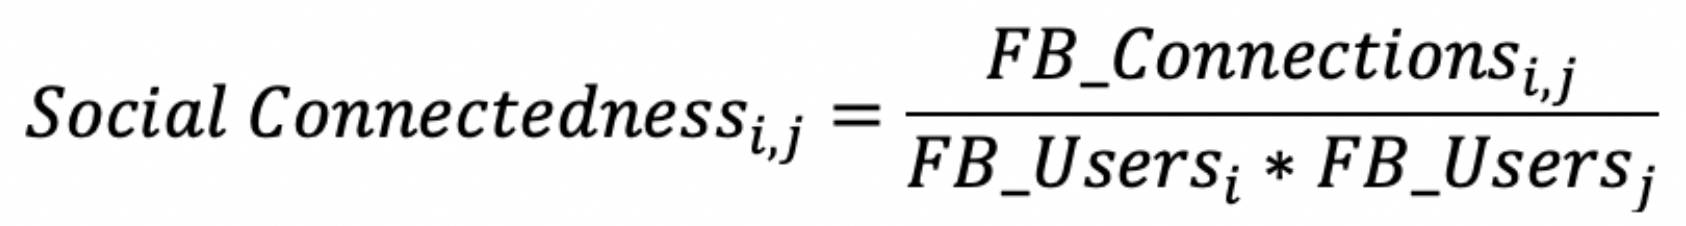

Here, FB_Usersi and FB_Usersj are the number of Facebook users in locations i and j, and FB_Connectionsi,j is the number of Facebook friendship connections between the two.

Social Connectednessi,j, therefore, measures the relative probability of a Facebook friendship link between a given Facebook user in location i and a user in location j. Put differently, if this measure is twice as large, a Facebook user in i is about twice as likely to be connected with a given Facebook user in j.

In each dataset, we scale the measure to have a fixed maximum value (by dividing the original measure by the maximum and multiplying by 1,000,000,000) and the lowest possible value of 1. We also round the measure to the nearest integer.


We exclude the following areas: Afghanistan, Western Sahara, China, Cuba, Iraq, Israel, Iran, North Korea, Russia, Syria, Somalia, South Sudan, Sudan, Venezuela, Yemen, Crimea, Jammu and Kashmir, Donetsk, Luhansk, Sevastopol, West Bank, and Gaza.

In [591]:
sc_index = pd.read_csv('countries-countries-fb-social-connectedness-index-october-2021.csv', sep='\t')

In [595]:
sc_index.head()
#here it's also GB

user_loc fr_loc  scaled_sci
0       AE     AE     1117179
1       AE     AG        5488
2       AE     AL        2101
3       AE     AM        3580
4       AE     AO        2326

In [596]:
sc_index.rename(columns={'user_loc': 'country1', 'fr_loc': 'country2'}, inplace=True)

Each row is a country – country pair. Countries are denoted by their ISO2 codes. Excludes certain countries, for example countries where Facebook is banned or countries with few active users.

In [597]:
country_pairs_sci = country_pairs_year.copy()
country_pairs_sci.head()

country issue_country  year  URL  Streams
0      AE            AE  2019  354   558523
1      AE            AE  2020  399   648159
2      AE            AE  2021   81   115387
3      AE            AU  2019    1     1060
4      AE            AU  2020  219   298271

In [598]:
country_pairs_sci = country_pairs_sci.merge(sc_index, how = 'left', left_on = ['country', 'issue_country'],
                                   right_on=['country1', 'country2'])

In [599]:
country_pairs_sci = country_pairs_sci[['country','issue_country','year','URL','Streams','scaled_sci']]
print(country_pairs_sci.shape)
country_pairs_sci.head()

(5616, 6)


country issue_country  year  URL  Streams  scaled_sci
0      AE            AE  2019  354   558523   1117179.0
1      AE            AE  2020  399   648159   1117179.0
2      AE            AE  2021   81   115387   1117179.0
3      AE            AU  2019    1     1060     11931.0
4      AE            AU  2020  219   298271     11931.0

In [600]:
country_pairs_sci.to_csv('country_pairs_sci.csv')

In [601]:
sci_no_mutual = country_pairs_sci.loc[country_pairs_sci['country'] != country_pairs_sci['issue_country']]
sci_no_mutual.shape

(5355, 6)

In [602]:
sci_no_mutual.sort_values(by='scaled_sci', ascending=False)[:5]

country issue_country  year  URL  Streams  scaled_sci
3267      LU            PT  2017    2     2457    753537.0
2104      GR            AL  2020    1     4093    435108.0
1865      FI            EE  2019    2    14159    388267.0
1622      EE            FI  2017   40    58985    388267.0
1623      EE            FI  2018   95   134438    388267.0

----

# Home Bias 

- the degree to which countries prefer music created in one’s home country

In [603]:
country_pairs_home_bias = country_pairs_year.copy()
country_pairs_home_bias.head()

country issue_country  year  URL  Streams
0      AE            AE  2019  354   558523
1      AE            AE  2020  399   648159
2      AE            AE  2021   81   115387
3      AE            AU  2019    1     1060
4      AE            AU  2020  219   298271

In [604]:
#total songs in charts in country per year
country_pairs_total = country_pairs_home_bias.groupby(['country', 'year'])['URL'].sum().reset_index().rename(columns={'URL':'total_URL'})
country_pairs_total.head(2)

country  year  total_URL
0      AE  2019      17031
1      AE  2020      51843

In [605]:
country_pairs_home_bias = country_pairs_home_bias.merge(country_pairs_total, how='left', on=['country', 'year'])
print(country_pairs_home_bias.shape)
country_pairs_home_bias.head()

(5616, 6)


country issue_country  year  URL  Streams  total_URL
0      AE            AE  2019  354   558523      17031
1      AE            AE  2020  399   648159      51843
2      AE            AE  2021   81   115387      34019
3      AE            AU  2019    1     1060      17031
4      AE            AU  2020  219   298271      51843

In [606]:
#total songs in charts from home country

home_bias = country_pairs_home_bias.loc[country_pairs_home_bias['country'] == country_pairs_home_bias['issue_country']]
home_bias = home_bias[['country', 'year', 'URL']].rename(columns={'URL':'total_domestic'})
home_bias.head(2)

country  year  total_domestic
0      AE  2019             354
1      AE  2020             399

In [607]:
country_pairs_home_bias = country_pairs_home_bias.merge(home_bias, how='left', on=['country', 'year'])
print(country_pairs_home_bias.shape)
country_pairs_home_bias.head()

(5616, 7)


country issue_country  year  URL  Streams  total_URL  total_domestic
0      AE            AE  2019  354   558523      17031           354.0
1      AE            AE  2020  399   648159      51843           399.0
2      AE            AE  2021   81   115387      34019            81.0
3      AE            AU  2019    1     1060      17031           354.0
4      AE            AU  2020  219   298271      51843           399.0

In [608]:
country_pairs_home_bias['domestic_ratio'] = country_pairs_home_bias['total_domestic']/country_pairs_home_bias['total_URL']

In [609]:
country_pairs_home_bias = country_pairs_home_bias.loc[country_pairs_home_bias['country'] != country_pairs_home_bias['issue_country']]

In [610]:
print(country_pairs_home_bias.shape)
country_pairs_home_bias.head()

(5355, 8)


country issue_country  year  URL  Streams  total_URL  total_domestic  \
3      AE            AU  2019    1     1060      17031           354.0   
4      AE            AU  2020  219   298271      51843           399.0   
5      AE            AU  2021   57    74271      34019            81.0   
6      AE            CA  2019    8    10616      17031           354.0   
7      AE            CA  2020  183   259488      51843           399.0   

   domestic_ratio  
3        0.020786  
4        0.007696  
5        0.002381  
6        0.020786  
7        0.007696

In [611]:
country_pairs_home_bias = country_pairs_home_bias[['country', 'year', 'domestic_ratio']]
country_pairs_home_bias.drop_duplicates(inplace=True)
country_pairs_home_bias.head()

country  year  domestic_ratio
3       AE  2019        0.020786
4       AE  2020        0.007696
5       AE  2021        0.002381
54      AL  2017             NaN
55      AL  2018             NaN

In [612]:
country_pairs_home_bias.year.value_counts()

2021    68
2020    66
2019    61
2018    60
2017    56
Name: year, dtype: int64

In [613]:
total_home_bias = country_pairs_home_bias.groupby(['year'])['domestic_ratio'].mean().to_frame()
total_home_bias.head()

domestic_ratio
year                
2017        0.180773
2018        0.205240
2019        0.243294
2020        0.258618
2021        0.267651

<BarContainer object of 5 artists>

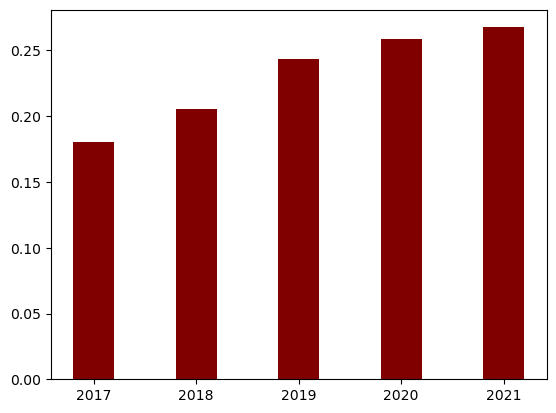

In [614]:
plt.bar(total_home_bias.index, total_home_bias.domestic_ratio, color ='maroon', width = 0.4)

After covid more sad songs // more home sick songs?
- home bias keeps increasing
- covid has an impact as well on music —> changes the way ppl listen to music
- the influence is more resilient

—> examine if after covid it is more likely to listen to songs that are cultural similar to me 
normally american songs everywhere // but since covid i started to feel sad more with home country songs 
validate that this distance would make an impact; sth changed // distance now would be measured in these new dimensions —> more convincing evidence after covid  

---------

# Gravity Model


1. [Final df](#Final-df)
3. [Model](#Model)

--> Look at Paper 'Local Trends in Global Music Streaming'

- The gravity model of international trade states that the volume of trade between two countries is proportional to their economic mass (approximated using GDP) and a measure of their relative trade frictions.
- We want to investigate whether there are trends in global music exchange that are connected to the SCI through the use of gravity modeling
- To quantify changes in global music exchange over time, we adopt gravity models, a technique borrowed from the economics literature and most often used to model trade flow between countries
- In their simplest form, gravity models assert that, given two countries i and j with economic masses Mi and Mj – frequently approximated using GDP – and separated by a physical distance distancei,j , the trade flow between the countries tradei,j follows the gravity equation


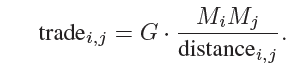


- G denotes a fixed gravitational constant. 
- This simple model provides a useful baseline for the amount of trade flow that one might reasonably expect to observe between countries based solely on their economic sizes and geographic proximity. Naturally, other factors contribute to trade partnerships, including, but not limited to, shared spoken language, colonial histories, or home bias (i.e., when i and j are the same country). Such factors can be incorporated directly into this regression framework by adding dummy variables to Equation 1.

--> incorporation of SCI


## Final df

In [184]:
#pip install gme

Note: you may need to restart the kernel to use updated packages.


In [615]:
import gme as gme
import pandas as pd

In [616]:
#Common Language
print(country_pairs_lng.shape)
#country_pairs_lng = country_pairs_lng.drop(columns='index')
country_pairs_lng.head(5)

(5616, 8)


country issue_country  year  URL  Streams country_language  \
0      AE            AE  2019  354   558523             [ar]   
1      AE            AE  2020  399   648159             [ar]   
2      AE            AE  2021   81   115387             [ar]   
3      AE            AU  2019    1     1060             [ar]   
4      AE            AU  2020  219   298271             [ar]   

  issue_country_language  common_language  
0                   [ar]                1  
1                   [ar]                1  
2                   [ar]                1  
3                   [en]                0  
4                   [en]                0

In [617]:
#SCI
country_pairs_sci['scaled_sci'] = 1/country_pairs_sci['scaled_sci']
print(country_pairs_sci.shape)
country_pairs_sci.head()

(5616, 6)


country issue_country  year  URL  Streams    scaled_sci
0      AE            AE  2019  354   558523  8.951117e-07
1      AE            AE  2020  399   648159  8.951117e-07
2      AE            AE  2021   81   115387  8.951117e-07
3      AE            AU  2019    1     1060  8.381527e-05
4      AE            AU  2020  219   298271  8.381527e-05

In [618]:
#Merging Common Language and SCI
#final_df = common_lng.merge(sci, how = 'inner', on = ['country', 'issue_country', 'year', 'URL'])
final_df = country_pairs_lng.merge(country_pairs_sci, how='left', on = ['country', 'issue_country', 'year', 'URL'])
print(final_df.shape)
print(final_df.year.value_counts())
final_df.head()

(5616, 10)
2021    1279
2020    1133
2019    1088
2018    1084
2017    1032
Name: year, dtype: int64


country issue_country  year  URL  Streams_x country_language  \
0      AE            AE  2019  354     558523             [ar]   
1      AE            AE  2020  399     648159             [ar]   
2      AE            AE  2021   81     115387             [ar]   
3      AE            AU  2019    1       1060             [ar]   
4      AE            AU  2020  219     298271             [ar]   

  issue_country_language  common_language  Streams_y    scaled_sci  
0                   [ar]                1     558523  8.951117e-07  
1                   [ar]                1     648159  8.951117e-07  
2                   [ar]                1     115387  8.951117e-07  
3                   [en]                0       1060  8.381527e-05  
4                   [en]                0     298271  8.381527e-05

In [619]:
final_df.isnull().sum()
#if i would use inner, then scaled_sci 0 NaN values

country                     0
issue_country               0
year                        0
URL                         0
Streams_x                   0
country_language            0
issue_country_language      0
common_language             0
Streams_y                   0
scaled_sci                326
dtype: int64

In [194]:
###DOWNLOADING CEPII DATASET
gravity_df = pd.read_csv('Gravity_V202102.csv')

In [620]:
gravity_df.year.value_counts(sort = False)
#Years Only Until 2019

1948    61504
1949    61504
1950    61504
1951    61504
1952    61504
        ...  
2015    61504
2016    61504
2017    61504
2018    61504
2019    61504
Name: year, Length: 72, dtype: int64

In [621]:
#Selecting relevant years
years = (gravity_df['year'] > 2016) & (gravity_df['year'] <= 2021)
gravity = gravity_df.loc[years]

In [622]:
gravity.year.value_counts()

2017    61504
2018    61504
2019    61504
Name: year, dtype: int64

In [623]:
gravity.head(2)

year iso3_o iso3_d  iso3num_o  iso3num_d  country_exists_o  \
69  2017    ABW    ABW      533.0      533.0                 1   
70  2018    ABW    ABW      533.0      533.0                 1   

    country_exists_d  gmt_offset_2020_o  gmt_offset_2020_d  contig  ...  \
69                 1               -4.0               -4.0     0.0  ...   
70                 1               -4.0               -4.0     0.0  ...   

    entry_time_o  entry_time_d  entry_tp_o  entry_tp_d  tradeflow_comtrade_o  \
69           NaN           NaN         NaN         NaN                   NaN   
70           NaN           NaN         NaN         NaN                   NaN   

    tradeflow_comtrade_d  tradeflow_baci  manuf_tradeflow_baci  \
69                   NaN             NaN                   NaN   
70                   NaN             NaN                   NaN   

    tradeflow_imf_o  tradeflow_imf_d  
69              NaN              NaN  
70              NaN              NaN  

[2 rows x 79 columns]

## Cultural Distance


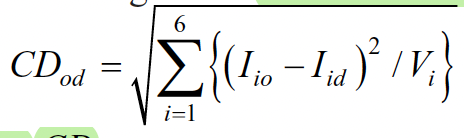

- CD: Cultural Distance origin - destination
- i: 1-6 culturial dimensions
- I: index of the ith cultural dimension of the origin
- V: variance of the index of the ith dimension

In [624]:
hofstede = country_pairs_culture_year.copy()
#hofstede = hofstede.drop(columns='index')
hofstede.head()

country_x issue_country  year  URL  Streams issue_country_fullname  \
0        AE            AE  2019  354   558523   United Arab Emirates   
1        AE            AE  2020  399   648159   United Arab Emirates   
2        AE            AE  2021   81   115387   United Arab Emirates   
3        AE            AU  2019    1     1060              Australia   
4        AE            AU  2020  219   298271              Australia   

       country_fullname ctr_x             country_y  pdi_x  ...  mas_y  uai_y  \
0  United Arab Emirates   ARA  United Arab Emirates   80.0  ...   53.0   68.0   
1  United Arab Emirates   ARA  United Arab Emirates   80.0  ...   53.0   68.0   
2  United Arab Emirates   ARA  United Arab Emirates   80.0  ...   53.0   68.0   
3  United Arab Emirates   ARA  United Arab Emirates   80.0  ...   61.0   51.0   
4  United Arab Emirates   ARA  United Arab Emirates   80.0  ...   61.0   51.0   

   ltowvs_y  ivr_y  pdi_difference idv_difference mas_difference  \
0      23.0   34.0             0.0            0.0            0.0   
1      23.0   34.0             0.0            0.0            0.0   
2      23.0   34.0             0.0            0.0            0.0   
3      21.0   71.0            42.0           52.0            8.0   
4      21.0   71.0            42.0           52.0            8.0   

   uai_difference  ltowvs_difference  ivr_difference  
0             0.0                0.0             0.0  
1             0.0                0.0             0.0  
2             0.0                0.0             0.0  
3            17.0                2.0            37.0  
4            17.0                2.0            37.0  

[5 rows x 29 columns]

In [625]:
hofstede.isnull().sum()

country_x                   0
issue_country               0
year                        0
URL                         0
Streams                     0
issue_country_fullname      0
country_fullname            0
ctr_x                     310
country_y                 310
pdi_x                     669
idv_x                     669
mas_x                     669
uai_x                     669
ltowvs_x                  664
ivr_x                     736
ctr_y                       5
country                     5
pdi_y                      83
idv_y                      83
mas_y                      83
uai_y                      83
ltowvs_y                   10
ivr_y                      61
pdi_difference            729
idv_difference            729
mas_difference            729
uai_difference            729
ltowvs_difference         664
ivr_difference            783
dtype: int64

In [626]:
from math import sqrt
import numpy as np

#for col in hofstede.columns[22:28]:
#Hofstede and Datset some countries may be left out --> closer look at it; which ones are missing 

###For each dimension Inner calculation under the root

pdi_inner_list = []
for row in hofstede['pdi_difference']:
    pdi_inner = row**2/np.var(hofstede['pdi_difference']) #like this pdi_inner is only the last value
    pdi_inner_list.append(pdi_inner)

idv_inner_list = []
for row in hofstede['idv_difference']:
    idv_inner = row**2/np.var(hofstede['idv_difference'])
    idv_inner_list.append(idv_inner)

mas_inner_list = []
for row in hofstede['mas_difference']:
    mas_inner = row**2/np.var(hofstede['mas_difference'])
    mas_inner_list.append(mas_inner)

uai_inner_list = []
for row in hofstede['uai_difference']:
    uai_inner = row**2/np.var(hofstede['uai_difference'])
    uai_inner_list.append(uai_inner)

ltowvs_inner_list = []
for row in hofstede['ltowvs_difference']:
    ltowvs_inner = row**2/np.var(hofstede['ltowvs_difference'])
    ltowvs_inner_list.append(ltowvs_inner)

ivr_inner_list = []
for row in hofstede['ivr_difference']:
    ivr_inner = row**2/np.var(hofstede['ivr_difference']) 
    ivr_inner_list.append(ivr_inner)

In [627]:
###Create new column CD for each country-pair in the Dataframe

hofstede['cd'] = 0.0
count = 0

def isNaN(num):
    return num != num

#iterate through each row 
for row in hofstede['cd']:
    
    inner_calc = 0
    
    #check for each country-pair, if the dimension differece is NaN
    #if NaN, 'pass' and go on to next dimension // otherwise add the dimension difference to inner calc
    #this way in cd column there are no NaNs 
    #bc for the sum inside the root only include dimensions that exist for BOTH counries
    if isNaN(pdi_inner_list[count]):
        pass
    else:
        inner_calc = inner_calc + pdi_inner_list[count]
        
    if isNaN(idv_inner_list[count]):
        pass
    else:
        inner_calc = inner_calc + idv_inner_list[count]
        
    if isNaN(mas_inner_list[count]):
        pass
    else:
        inner_calc = inner_calc + mas_inner_list[count]
    
    if isNaN(uai_inner_list[count]):
        pass
    else:
        inner_calc = inner_calc + uai_inner_list[count]
    
    if isNaN(ltowvs_inner_list[count]):
        pass
    else:
        inner_calc = inner_calc + ltowvs_inner_list[count]
        
    if isNaN(ivr_inner_list[count]):
        pass
    else:
        inner_calc = inner_calc + ivr_inner_list[count]
     
    #take the root only for dimensions where no NaN
    hofstede['cd'][count] = sqrt(inner_calc)
    count += 1

hofstede.head()

country_x issue_country  year  URL  Streams issue_country_fullname  \
0        AE            AE  2019  354   558523   United Arab Emirates   
1        AE            AE  2020  399   648159   United Arab Emirates   
2        AE            AE  2021   81   115387   United Arab Emirates   
3        AE            AU  2019    1     1060              Australia   
4        AE            AU  2020  219   298271              Australia   

       country_fullname ctr_x             country_y  pdi_x  ...  uai_y  \
0  United Arab Emirates   ARA  United Arab Emirates   80.0  ...   68.0   
1  United Arab Emirates   ARA  United Arab Emirates   80.0  ...   68.0   
2  United Arab Emirates   ARA  United Arab Emirates   80.0  ...   68.0   
3  United Arab Emirates   ARA  United Arab Emirates   80.0  ...   51.0   
4  United Arab Emirates   ARA  United Arab Emirates   80.0  ...   51.0   

   ltowvs_y  ivr_y  pdi_difference  idv_difference mas_difference  \
0      23.0   34.0             0.0             0.0            0.0   
1      23.0   34.0             0.0             0.0            0.0   
2      23.0   34.0             0.0             0.0            0.0   
3      21.0   71.0            42.0            52.0            8.0   
4      21.0   71.0            42.0            52.0            8.0   

  uai_difference  ltowvs_difference  ivr_difference        cd  
0            0.0                0.0             0.0  0.000000  
1            0.0                0.0             0.0  0.000000  
2            0.0                0.0             0.0  0.000000  
3           17.0                2.0            37.0  4.186266  
4           17.0                2.0            37.0  4.186266  

[5 rows x 30 columns]

In [628]:
hofstede = hofstede[['country_x', 'issue_country', 'year', 'cd']]
hofstede.rename(columns={'country_x': 'country'}, inplace=True)

In [629]:
#hofstede['cd'] = hofstede['cd'].replace({0.0:np.nan})
#eco_dist.loc[eco_dist.country_iso3 == eco_dist.issue_country_iso3, 'tradeflow_o_d_percentage'] = 0.0

In [630]:
hofstede.isnull().sum()

country          0
issue_country    0
year             0
cd               0
dtype: int64

In [631]:
hofstede.head()

country issue_country  year        cd
0      AE            AE  2019  0.000000
1      AE            AE  2020  0.000000
2      AE            AE  2021  0.000000
3      AE            AU  2019  4.186266
4      AE            AU  2020  4.186266

In [632]:
hofstede.to_csv('country_pairs_culture.csv')

In [633]:
country_pairs_culture = hofstede.copy()

## Geographic Distance

In [634]:
geo_dist = gravity[['iso3_o', 'iso3_d', 'distcap']]
geo_dist.rename(columns={'iso3_o': 'issue_country_iso3', 'iso3_d':'country_iso3'}, inplace=True)
geo_dist = geo_dist.drop_duplicates() #geographic distance stays the smae no matter the year
geo_dist.head()

issue_country_iso3 country_iso3    distcap
69                 ABW          ABW      5.225
141                ABW          AFG  13257.814
213                ABW          AGO   9516.913
285                ABW          AIA    983.268
357                ABW          ALB   9091.742

In [635]:
#WHY HERE DISTANCE
geo_dist.loc[geo_dist.country_iso3 == geo_dist.issue_country_iso3]

issue_country_iso3 country_iso3  distcap
69                     ABW          ABW    5.225
17997                  AFG          AFG  303.761
35925                  AGO          AGO  419.967
53853                  AIA          AIA    3.799
71781                  ALB          ALB   63.773
...                    ...          ...      ...
4356573                YMD          YMD      NaN
4374501                YUG          YUG      NaN
4392429                ZAF          ZAF  415.430
4410357                ZMB          ZMB  326.302
4428285                ZWE          ZWE  235.119

[248 rows x 3 columns]

In [212]:
#geo_dist.loc[geo_dist.country_iso3 == geo_dist.issue_country_iso3, 'distcap'] = 0.0
#geo_dist.head()

In [637]:
#Getting Iso3 for every column
country_iso3 = []

for country in final_df['country']:
    iso3 = list(CountryInfo(country).iso().values())[1]
    country_iso3.append(iso3)

In [638]:
#Getting Iso3 for every column
issue_country_iso3 = []

for country in final_df['issue_country']:
    iso3 = list(CountryInfo(country).iso().values())[1]
    issue_country_iso3.append(iso3)

In [639]:
final_df['country_iso3'] = country_iso3
final_df['issue_country_iso3'] = issue_country_iso3

In [640]:
final_df.head()

country issue_country  year  URL  Streams_x country_language  \
0      AE            AE  2019  354     558523             [ar]   
1      AE            AE  2020  399     648159             [ar]   
2      AE            AE  2021   81     115387             [ar]   
3      AE            AU  2019    1       1060             [ar]   
4      AE            AU  2020  219     298271             [ar]   

  issue_country_language  common_language  Streams_y    scaled_sci  \
0                   [ar]                1     558523  8.951117e-07   
1                   [ar]                1     648159  8.951117e-07   
2                   [ar]                1     115387  8.951117e-07   
3                   [en]                0       1060  8.381527e-05   
4                   [en]                0     298271  8.381527e-05   

  country_iso3 issue_country_iso3  
0          ARE                ARE  
1          ARE                ARE  
2          ARE                ARE  
3          ARE                AUS  
4          ARE                AUS

In [641]:
print(final_df.shape)
print(geo_dist.shape)

(5616, 12)
(61504, 3)


## Economic Distance

- We measured economic distance as the
inverse of the average percentage of bilateral trade
flows between an origin and destination over total
international trade to reflect countries’ economic distance
(in log). Data were constructed from the CEPII
Gravity database. A positive and significant estimate
of lndist_eco lends support to H2c.

- Reverse percentages (or inverse percentages) means working backwards to find an original amount, given a percentage of that amount. We can do this using a calculator by taking the percentage we have been given, dividing to find 1% and then multiplying by 100 to find 100% .

- Every number has an “inverse” which is calculated by dividing 1 by that number. For example, the inverse of 5 is 1/5 (or 0.2) Calculate the average of the set (A+B+C+D+E+F)/6 = G, and then calculate the inverse of that average (1/G).

In [642]:
#Selecting relevant years WITH 2016 bc of lagged value
years = (gravity_df['year'] >= 2016) & (gravity_df['year'] <= 2021)
gravity_2016 = gravity_df.loc[years]

In [643]:
eco_dist = gravity_2016[['iso3_o', 'iso3_d', 'year', 'tradeflow_comtrade_o', 'tradeflow_comtrade_d']]

#eco_dist = gravity_2016[['iso3_o', 'iso3_d', 'year', 'tradeflow_imf_o', 'tradeflow_imf_d']] #less missing values
#eco_dist3 = gravity[['iso3_o', 'iso3_d', 'tradeflow_baci', 'manuf_tradeflow_baci']]

In [265]:
#test = gravity_2016[['iso3_o', 'iso3_d', 'year', 'tradeflow_imf_o', 'tradeflow_imf_d']]

In [266]:
#x = test.loc[test['iso3_o'] == test['iso3_d']]
#x.loc[x.tradeflow_imf_d > 0]

In [644]:
print(eco_dist.shape)
eco_dist.isnull().sum()

(246016, 5)


iso3_o                       0
iso3_d                       0
year                         0
tradeflow_comtrade_o    163979
tradeflow_comtrade_d    151220
dtype: int64

In [645]:
eco_dist.year.value_counts()

2016    61504
2017    61504
2018    61504
2019    61504
Name: year, dtype: int64

In [646]:
eco_dist['year_lagged'] = eco_dist['year']+1

In [647]:
eco_dist.rename(columns={'iso3_o': 'issue_country_iso3', 'iso3_d': 'country_iso3'}, inplace=True)
#eco_dist = eco_dist.loc[eco_dist['country_iso3'] != eco_dist['issue_country_iso3']]
eco_dist.head()

#tradeflow = exports - imports
#tradeflow_total = tradeflow_imf_o + tradeflow_imf_d
#tradeflow_imf_o: tradeflow as reported by the exporter/origin
#tradeflow_imf_d: tradeflow as reported by the importer/destination

issue_country_iso3 country_iso3  year  tradeflow_comtrade_o  \
68                 ABW          ABW  2016                   NaN   
69                 ABW          ABW  2017                   NaN   
70                 ABW          ABW  2018                   NaN   
71                 ABW          ABW  2019                   NaN   
140                ABW          AFG  2016                   NaN   

     tradeflow_comtrade_d  year_lagged  
68                    NaN         2017  
69                    NaN         2018  
70                    NaN         2019  
71                    NaN         2020  
140                   NaN         2017

----
Getting 2020 trade flow data from Comtrade

In [648]:
tradeflow_2020 = pd.read_csv('tradeflow_2020.csv')
tradeflow_2020 = tradeflow_2020.drop(columns='Unnamed: 0')
tradeflow_2020['year_lagged'] = tradeflow_2020['year']+1
print(tradeflow_2020.shape)
tradeflow_2020.head()

(1842, 6)


issue_country_iso3 country_iso3  year  tradeflow_comtrade_o  \
0                ARE          ARE  2020                   NaN   
1                AUS          ARE  2020           1949549.209   
2                CAN          ARE  2020           1300872.605   
3                CHE          ARE  2020           2448768.053   
4                DEU          ARE  2020           7902252.951   

   tradeflow_comtrade_d  year_lagged  
0                   NaN         2021  
1           1660694.443         2021  
2           1774171.165         2021  
3           2410189.036         2021  
4           8562909.028         2021

In [649]:
tradeflow_2020.isnull().sum()

issue_country_iso3        0
country_iso3              0
year                      0
tradeflow_comtrade_o    166
tradeflow_comtrade_d    148
year_lagged               0
dtype: int64

In [650]:
print(eco_dist.shape)
print(tradeflow_2020.shape)

(246016, 6)
(1842, 6)


In [651]:
eco_dist = pd.concat([eco_dist, tradeflow_2020])

In [652]:
print(eco_dist.shape)
print('\n', eco_dist.year.value_counts())
print('\n', eco_dist.isnull().sum())
eco_dist.head(2)

(247858, 6)

 2016    61504
2017    61504
2018    61504
2019    61504
2020     1842
Name: year, dtype: int64

 issue_country_iso3           0
country_iso3                 0
year                         0
tradeflow_comtrade_o    164145
tradeflow_comtrade_d    151368
year_lagged                  0
dtype: int64


issue_country_iso3 country_iso3  year  tradeflow_comtrade_o  \
68                ABW          ABW  2016                   NaN   
69                ABW          ABW  2017                   NaN   

    tradeflow_comtrade_d  year_lagged  
68                   NaN         2017  
69                   NaN         2018

In [653]:
#check = eco_dist.loc[eco_dist.issue_country_iso3 == eco_dist.country_iso3]
#print(check.tradeflow_comtrade_o.value_counts())
#print(check.tradeflow_comtrade_d.value_counts())

In [654]:
#check.loc[check.tradeflow_comtrade_o > 0]

In [655]:
country_pairs_eco = country_pairs_year.copy()
#country_pairs_eco = country_pairs_eco.drop(columns='index')
print(country_pairs_eco.shape)
country_pairs_eco.head(3)

(5616, 5)


country issue_country  year  URL  Streams
0      AE            AE  2019  354   558523
1      AE            AE  2020  399   648159
2      AE            AE  2021   81   115387

In [657]:
#Getting Iso3 for every column
country_iso3 = []

for country in country_pairs_eco['country']:
    iso3 = list(CountryInfo(country).iso().values())[1]
    country_iso3.append(iso3)

In [658]:
#Getting Iso3 for every column
issue_country_iso3 = []

for country in country_pairs_eco['issue_country']:
    iso3 = list(CountryInfo(country).iso().values())[1]
    issue_country_iso3.append(iso3)

In [659]:
country_pairs_eco['country_iso3'] = country_iso3
country_pairs_eco['issue_country_iso3'] = issue_country_iso3

In [660]:
country_pairs_eco.head(2)

country issue_country  year  URL  Streams country_iso3 issue_country_iso3
0      AE            AE  2019  354   558523          ARE                ARE
1      AE            AE  2020  399   648159          ARE                ARE

In [661]:
eco_dist.head(2)

issue_country_iso3 country_iso3  year  tradeflow_comtrade_o  \
68                ABW          ABW  2016                   NaN   
69                ABW          ABW  2017                   NaN   

    tradeflow_comtrade_d  year_lagged  
68                   NaN         2017  
69                   NaN         2018

In [662]:
country_pairs_eco = country_pairs_eco.merge(eco_dist, how='left', left_on=['country_iso3', 'issue_country_iso3', 'year'],
                                           right_on=['country_iso3', 'issue_country_iso3', 'year_lagged'])

In [663]:
print(country_pairs_eco.shape)
#print(country_pairs_eco.year.value_counts())
country_pairs_eco.head(2)

(5616, 11)


country issue_country  year_x  URL  Streams country_iso3 issue_country_iso3  \
0      AE            AE    2019  354   558523          ARE                ARE   
1      AE            AE    2020  399   648159          ARE                ARE   

   year_y  tradeflow_comtrade_o  tradeflow_comtrade_d  year_lagged  
0    2018                   NaN                   NaN         2019  
1    2019                   NaN                   NaN         2020

In [664]:
country_pairs_eco = country_pairs_eco.drop(columns='year_y')
country_pairs_eco = country_pairs_eco.drop(columns='year_lagged')
country_pairs_eco.rename(columns={'year_x': 'year'}, inplace=True)

------

In [665]:
#total sum of exporter & importer
country_pairs_eco['tradeflow_o_d'] = country_pairs_eco['tradeflow_comtrade_o'] + country_pairs_eco['tradeflow_comtrade_d']

In [666]:
#total international trade of both country
tradeflow_o_total = country_pairs_eco.groupby(['issue_country_iso3', 'year']).tradeflow_comtrade_o.sum().to_frame()
tradeflow_o_total.reset_index(inplace=True) 
tradeflow_o_total.rename(columns={'tradeflow_comtrade_o': 'tradeflow_o_total'}, inplace=True)
tradeflow_o_total.head(2)

issue_country_iso3  year  tradeflow_o_total
0                ALB  2019         169694.487
1                ALB  2020              0.000

In [667]:
#total international trade of both country
tradeflow_d_total = country_pairs_eco.groupby(['country_iso3', 'year']).tradeflow_comtrade_d.sum().to_frame()
tradeflow_d_total.reset_index(inplace=True) 
tradeflow_d_total.rename(columns={'tradeflow_comtrade_d': 'tradeflow_d_total'}, inplace=True)
tradeflow_d_total.head(2)

country_iso3  year  tradeflow_d_total
0          ALB  2017        1023975.898
1          ALB  2018        2675612.259

In [668]:
country_pairs_eco = country_pairs_eco.merge(tradeflow_o_total, how = 'left', on = ['issue_country_iso3', 'year'])
country_pairs_eco = country_pairs_eco.merge(tradeflow_d_total, how = 'left', on = ['country_iso3', 'year'])

In [669]:
print(country_pairs_eco.shape)
print(country_pairs_eco.year.value_counts())

(5616, 12)
2021    1279
2020    1133
2019    1088
2018    1084
2017    1032
Name: year, dtype: int64


In [670]:
country_pairs_eco.head(2)

country issue_country  year  URL  Streams country_iso3 issue_country_iso3  \
0      AE            AE  2019  354   558523          ARE                ARE   
1      AE            AE  2020  399   648159          ARE                ARE   

   tradeflow_comtrade_o  tradeflow_comtrade_d  tradeflow_o_d  \
0                   NaN                   NaN            NaN   
1                   NaN                   NaN            NaN   

   tradeflow_o_total  tradeflow_d_total  
0       3.065335e+07       8.106916e+07  
1       0.000000e+00       0.000000e+00

In [671]:
country_pairs_eco['tradeflow_o_d_percentage'] = country_pairs_eco['tradeflow_o_d']/(country_pairs_eco['tradeflow_o_total']+country_pairs_eco['tradeflow_d_total'])
#eco_dist.head()
#eco_dist.loc[eco_dist['tradeflow_o_d_percentage'] > 0]

In [672]:
#eco_dist.loc[eco_dist.country_iso3 == eco_dist.issue_country_iso3, 'tradeflow_o_d_percentage'] = 0.0

In [673]:
country_pairs_eco = country_pairs_eco[['country_iso3', 'issue_country_iso3', 'year', 'tradeflow_o_d_percentage']]
#eco_dist.dropna()

In [674]:
country_pairs_eco['tradeflow_o_d_percentage']

0            NaN
1            NaN
2            NaN
3       0.034564
4            NaN
          ...   
5611         NaN
5612         NaN
5613         NaN
5614         NaN
5615         NaN
Name: tradeflow_o_d_percentage, Length: 5616, dtype: float64

In [675]:
#Taking the inverse
country_pairs_eco['tradeflow_o_d_percentage'] = 1/country_pairs_eco['tradeflow_o_d_percentage']

In [676]:
country_pairs_eco['tradeflow_o_d_percentage']

0             NaN
1             NaN
2             NaN
3       28.932136
4             NaN
          ...    
5611          NaN
5612          NaN
5613          NaN
5614          NaN
5615          NaN
Name: tradeflow_o_d_percentage, Length: 5616, dtype: float64

In [677]:
country_pairs_eco.head()

country_iso3 issue_country_iso3  year  tradeflow_o_d_percentage
0          ARE                ARE  2019                       NaN
1          ARE                ARE  2020                       NaN
2          ARE                ARE  2021                       NaN
3          ARE                AUS  2019                 28.932136
4          ARE                AUS  2020                       NaN

In [678]:
#eco_dist.head(100)
#eco_dist.loc[eco_dist.country_iso3 == eco_dist.issue_country_iso3, 'tradeflow_o_d_percentage'] = 0.0
country_pairs_eco.loc[country_pairs_eco['tradeflow_o_d_percentage'] > 0]

country_iso3 issue_country_iso3  year  tradeflow_o_d_percentage
3             ARE                AUS  2019                 28.932136
5             ARE                AUS  2021                 41.613194
6             ARE                CAN  2019                167.242111
8             ARE                CAN  2021                132.303804
9             ARE                CHE  2021                 40.697977
...           ...                ...   ...                       ...
5606          ZAF                SWE  2020                 93.214651
5607          ZAF                SWE  2021                106.089108
5608          ZAF                USA  2018                117.398345
5609          ZAF                USA  2019                100.935659
5610          ZAF                USA  2020                128.191924

[4870 rows x 4 columns]

In [679]:
print(country_pairs_eco.shape)
country_pairs_eco.isnull().sum()

(5616, 4)


country_iso3                  0
issue_country_iso3            0
year                          0
tradeflow_o_d_percentage    746
dtype: int64

In [680]:
country_pairs_eco.to_csv('country_pairs_eco.csv')

In [681]:
test = country_pairs_eco.loc[country_pairs_eco.issue_country_iso3 == country_pairs_eco.country_iso3]
test.loc[test.tradeflow_o_d_percentage > 0]

country_iso3 issue_country_iso3  year  tradeflow_o_d_percentage
601          BRA                BRA  2019                 14.435765

How do you calculate bilateral trade balance?
- Bilateral trade balances are calculated by adding up all of Country A’s exports to Country B, then subtracting all of Country A’s imports from Country B. If the resulting number is positive, Country A is said to have a “trade surplus” with Country B. In other words, the value of its exports is larger than the value of its imports. On the other hand, if imports outweigh exports, Country A would be said to have a “trade deficit” with Country B.

## Final_df

In [682]:
df_model = final_df.copy()
print(df_model.shape)
df_model.head(3)

(5616, 12)


country issue_country  year  URL  Streams_x country_language  \
0      AE            AE  2019  354     558523             [ar]   
1      AE            AE  2020  399     648159             [ar]   
2      AE            AE  2021   81     115387             [ar]   

  issue_country_language  common_language  Streams_y    scaled_sci  \
0                   [ar]                1     558523  8.951117e-07   
1                   [ar]                1     648159  8.951117e-07   
2                   [ar]                1     115387  8.951117e-07   

  country_iso3 issue_country_iso3  
0          ARE                ARE  
1          ARE                ARE  
2          ARE                ARE

In [683]:
#Merging with Hofstede
df_model = df_model.merge(country_pairs_culture, how = 'left', on = ['country', 'issue_country', 'year'])
df_model.rename(columns={'cd': 'dist_cultural', 'scaled_sci': 'dist_social'}, inplace=True)
df_model.head(3)

country issue_country  year  URL  Streams_x country_language  \
0      AE            AE  2019  354     558523             [ar]   
1      AE            AE  2020  399     648159             [ar]   
2      AE            AE  2021   81     115387             [ar]   

  issue_country_language  common_language  Streams_y   dist_social  \
0                   [ar]                1     558523  8.951117e-07   
1                   [ar]                1     648159  8.951117e-07   
2                   [ar]                1     115387  8.951117e-07   

  country_iso3 issue_country_iso3  dist_cultural  
0          ARE                ARE            0.0  
1          ARE                ARE            0.0  
2          ARE                ARE            0.0

In [684]:
#Merging with Geographic Distance
df_model = df_model.merge(geo_dist, how = 'left', on = ['country_iso3', 'issue_country_iso3'])
df_model.rename(columns={'distcap': 'dist_geo'}, inplace=True)
df_model.head(3)

country issue_country  year  URL  Streams_x country_language  \
0      AE            AE  2019  354     558523             [ar]   
1      AE            AE  2020  399     648159             [ar]   
2      AE            AE  2021   81     115387             [ar]   

  issue_country_language  common_language  Streams_y   dist_social  \
0                   [ar]                1     558523  8.951117e-07   
1                   [ar]                1     648159  8.951117e-07   
2                   [ar]                1     115387  8.951117e-07   

  country_iso3 issue_country_iso3  dist_cultural  dist_geo  
0          ARE                ARE            0.0   108.789  
1          ARE                ARE            0.0   108.789  
2          ARE                ARE            0.0   108.789

In [685]:
country_pairs_eco.head()

country_iso3 issue_country_iso3  year  tradeflow_o_d_percentage
0          ARE                ARE  2019                       NaN
1          ARE                ARE  2020                       NaN
2          ARE                ARE  2021                       NaN
3          ARE                AUS  2019                 28.932136
4          ARE                AUS  2020                       NaN

In [686]:
#Merging with Economic Distance
df_model = df_model.merge(country_pairs_eco, how = 'left', on = ['country_iso3', 'issue_country_iso3', 'year'])
df_model.rename(columns={'tradeflow_o_d_percentage': 'dist_eco'}, inplace=True)
df_model.head(3)

country issue_country  year  URL  Streams_x country_language  \
0      AE            AE  2019  354     558523             [ar]   
1      AE            AE  2020  399     648159             [ar]   
2      AE            AE  2021   81     115387             [ar]   

  issue_country_language  common_language  Streams_y   dist_social  \
0                   [ar]                1     558523  8.951117e-07   
1                   [ar]                1     648159  8.951117e-07   
2                   [ar]                1     115387  8.951117e-07   

  country_iso3 issue_country_iso3  dist_cultural  dist_geo  dist_eco  
0          ARE                ARE            0.0   108.789       NaN  
1          ARE                ARE            0.0   108.789       NaN  
2          ARE                ARE            0.0   108.789       NaN

In [687]:
#Home-Bias
df_model['home_bias'] = 0
df_model.loc[df_model.country == df_model.issue_country, 'home_bias'] = 1
df_model.head(3)

country issue_country  year  URL  Streams_x country_language  \
0      AE            AE  2019  354     558523             [ar]   
1      AE            AE  2020  399     648159             [ar]   
2      AE            AE  2021   81     115387             [ar]   

  issue_country_language  common_language  Streams_y   dist_social  \
0                   [ar]                1     558523  8.951117e-07   
1                   [ar]                1     648159  8.951117e-07   
2                   [ar]                1     115387  8.951117e-07   

  country_iso3 issue_country_iso3  dist_cultural  dist_geo  dist_eco  \
0          ARE                ARE            0.0   108.789       NaN   
1          ARE                ARE            0.0   108.789       NaN   
2          ARE                ARE            0.0   108.789       NaN   

   home_bias  
0          1  
1          1  
2          1

In [688]:
df_model['home_bias'].value_counts()

0    5355
1     261
Name: home_bias, dtype: int64

In [693]:
#df_model = df_model.drop(columns='year_lagged')
#df_model = df_model.drop(columns='year_y')
#df_model = df_model.drop(columns='Streams_y')
df_model.rename(columns={'URL': 'chart_survival'}, inplace=True)
df_model.rename(columns={'year_x': 'year', 'Streams_x': 'Streams'}, inplace=True)

In [694]:
df_model.head(3)

country issue_country  year  chart_survival  Streams country_language  \
0      AE            AE  2019             354   558523             [ar]   
1      AE            AE  2020             399   648159             [ar]   
2      AE            AE  2021              81   115387             [ar]   

  issue_country_language  common_language   dist_social country_iso3  \
0                   [ar]                1  8.951117e-07          ARE   
1                   [ar]                1  8.951117e-07          ARE   
2                   [ar]                1  8.951117e-07          ARE   

  issue_country_iso3  dist_cultural  dist_geo  dist_eco  home_bias  
0                ARE            0.0   108.789       NaN          1  
1                ARE            0.0   108.789       NaN          1  
2                ARE            0.0   108.789       NaN          1

In [695]:
df_model.isnull().sum()

country                     0
issue_country               0
year                        0
chart_survival              0
Streams                     0
country_language            0
issue_country_language      0
common_language             0
dist_social               326
country_iso3                0
issue_country_iso3          0
dist_cultural               0
dist_geo                    0
dist_eco                  746
home_bias                   0
dtype: int64

In [696]:
#the higher, the closer
print('Social Distance')
print(df_model.dist_social.min())
print(df_model.dist_social.max())

#the smaller, the closer
print('\nCultural Distance')
print(df_model.dist_cultural.min())
print(df_model.dist_cultural.max())

#the smaller, the closer
print('\nGeographical Distance')
print(df_model.dist_geo.min())
print(df_model.dist_geo.max())

#the higher, the closer
print('\nEconomic Distance')
print(df_model.dist_eco.min())
print(df_model.dist_eco.max())

Social Distance
5.392582078415671e-09
0.008130081300813009

Cultural Distance
0.0
7.906986274207698

Geographical Distance
9.56
19629.504

Economic Distance
1.6623576104926998
57453.411214307416


In [697]:
df_model.to_csv('df_final.csv')

In [698]:
#Testing

#df_model.loc[df_model.scaled_sci == 123] #--> Thailand & Brazil socially far away connected
#df_model.loc[df_model.dist_social == 435108] #--> Greece & Albania socially connected

#df_model.loc[df_model.cd == 0.12384127797197561] #--> Australia & USA similar culture
#df_model.loc[df_model.cd == 8.04495330499361] #--> Slovakia & Denmark really diffrent culture

#df_model.loc[df_model.dist_geo == 59.617] #--> Slovakia & AUT locally close
#df_model.loc[df_model.dist_geo == 19629.504] #--> South Korea & Urugay locally far away

#df_model.loc[df_model.dist_eco == 2.22636861515322e-06] #--> El Salvador & Bulgaria economically far
#df_model.loc[df_model.dist_eco == 1.2339931720910018] #--> US & Canada economically close

In [699]:
cols = ['dist_social', 'dist_cultural', 'dist_geo', 'dist_eco']
df_model[cols] = df_model[cols].replace({0:np.nan})

In [700]:
df_model[['chart_survival', 'Streams', 'dist_social', 'dist_cultural', 'dist_geo', 'dist_eco']] = np.log(
    df_model[['chart_survival', 'Streams', 'dist_social', 'dist_cultural', 'dist_geo', 'dist_eco']])

In [701]:
df_model.head()

country issue_country  year  chart_survival    Streams country_language  \
0      AE            AE  2019        5.869297  13.233051             [ar]   
1      AE            AE  2020        5.988961  13.381891             [ar]   
2      AE            AE  2021        4.394449  11.656047             [ar]   
3      AE            AU  2019        0.000000   6.966024             [ar]   
4      AE            AU  2020        5.389072  12.605758             [ar]   

  issue_country_language  common_language  dist_social country_iso3  \
0                   [ar]                1   -13.926317          ARE   
1                   [ar]                1   -13.926317          ARE   
2                   [ar]                1   -13.926317          ARE   
3                   [en]                0    -9.386895          ARE   
4                   [en]                0    -9.386895          ARE   

  issue_country_iso3  dist_cultural  dist_geo  dist_eco  home_bias  
0                ARE            NaN  4.689410       NaN          1  
1                ARE            NaN  4.689410       NaN          1  
2                ARE            NaN  4.689410       NaN          1  
3                AUS       1.431809  9.389546  3.364953          0  
4                AUS       1.431809  9.389546       NaN          0

In [702]:
df_model.to_csv('df_final_log.csv')

In [2]:
df_model = pd.read('df_final_log.csv')

AttributeError: module 'pandas' has no attribute 'read'

In [703]:
#df_model.loc[df_model.dist_cultural != 'NaN']
#test.home_bias.value_counts()

In [704]:
df_model.year.value_counts()

2021    1279
2020    1133
2019    1088
2018    1084
2017    1032
Name: year, dtype: int64

In [755]:
df_model.shape

(5616, 15)

In [757]:
print(df_model.country.nunique())
print(df_model.issue_country.nunique())

69
60


In [756]:
test = df_model.copy()

test = test.loc[test.home_bias == 1]
print(test.dist_eco.unique())

test2 = test.loc[test.year >= 2020]
print(test2.dist_eco.unique())

[       nan 2.66970881]
[nan]


------

In [706]:
df_model_no_mutual = df_model.copy()

In [708]:
df_model_no_mutual = df_model_no_mutual.loc[df_model_no_mutual['country'] != df_model_no_mutual['issue_country']]
print(df_model_no_mutual.shape)
df_model_no_mutual.head(3)

(5355, 15)


country issue_country  year  chart_survival    Streams country_language  \
3      AE            AU  2019        0.000000   6.966024             [ar]   
4      AE            AU  2020        5.389072  12.605758             [ar]   
5      AE            AU  2021        4.043051  11.215476             [ar]   

  issue_country_language  common_language  dist_social country_iso3  \
3                   [en]                0    -9.386895          ARE   
4                   [en]                0    -9.386895          ARE   
5                   [en]                0    -9.386895          ARE   

  issue_country_iso3  dist_cultural  dist_geo  dist_eco  home_bias  
3                AUS       1.431809  9.389546  3.364953          0  
4                AUS       1.431809  9.389546       NaN          0  
5                AUS       1.431809  9.389546  3.728417          0

In [709]:
smallest_sample = df_model_no_mutual.copy()
smallest_sample = smallest_sample.dropna()
#smallest_sample = smallest_sample.loc[smallest_sample.chart_survival > 0]
print(smallest_sample.shape)
smallest_sample.head()

(4375, 15)


country issue_country  year  chart_survival    Streams country_language  \
3      AE            AU  2019        0.000000   6.966024             [ar]   
5      AE            AU  2021        4.043051  11.215476             [ar]   
6      AE            CA  2019        2.079442   9.270118             [ar]   
8      AE            CA  2021        5.908083  13.168040             [ar]   
9      AE            CH  2021        4.234107  11.388665             [ar]   

  issue_country_language  common_language  dist_social country_iso3  \
3                   [en]                0    -9.386895          ARE   
5                   [en]                0    -9.386895          ARE   
6               [en, fr]                0    -9.515322          ARE   
8               [en, fr]                0    -9.515322          ARE   
9           [de, fr, it]                0    -8.828787          ARE   

  issue_country_iso3  dist_cultural  dist_geo  dist_eco  home_bias  
3                AUS       1.431809  9.389546  3.364953          0  
5                AUS       1.431809  9.389546  3.728417          0  
6                CAN       1.246133  9.283880  5.119443          0  
8                CAN       1.246133  9.283880  4.885101          0  
9                CHE       1.436599  8.482754  3.706178          0

## Descriptive Statistics

In [710]:
descriptive_stat = df_model.copy()

In [711]:
descriptive_stat = descriptive_stat.drop(columns='year')

In [712]:
descriptive_stat.describe()

chart_survival      Streams  common_language  dist_social  \
count     5616.000000  5616.000000      5616.000000  5290.000000   
mean         4.870725    13.863668         0.184829    -8.733850   
std          2.847150     3.400648         0.388193     2.049287   
min          0.000000     6.909753         0.000000   -19.038242   
25%          2.639057    11.280605         0.000000    -9.607841   
50%          4.955827    13.819230         0.000000    -8.626406   
75%          6.805999    16.313692         0.000000    -7.321850   
max         11.108994    24.787480         1.000000    -4.812184   

       dist_cultural     dist_geo     dist_eco    home_bias  
count    5050.000000  5616.000000  4870.000000  5616.000000  
mean        1.206954     8.125494     4.856724     0.046474  
std         0.469718     1.263286     1.720720     0.210529  
min        -2.108513     2.257588     0.508237     0.000000  
25%         1.034227     7.223682     3.660454     0.000000  
50%         1.306740     8.475616     4.750226     0.000000  
75%         1.527363     9.156264     5.905226     0.000000  
max         2.067747     9.884789    10.958730     1.000000

### Overview Variables:

Dependent Variable: (major variable of interest)
- **URL** --> reflects the strength of the music influence from the origin country to the destination country

Independent Variables: (these are the variables that we think will influence the music consumption)
- **Common Language**: common_language (dummy variable)
- **Home Bias**: home_bias (dummy variable)
- **Social Distance**: dist_social (static variable)
- **Cultural distance**: dist_cultural (static variable)
- **Geographic Distance**: dist_geo (static variable); in km between the capital cities of an origin and destination country
- **Economic Distance**: dist_eco (dynamic value); we're using its lagged value. For example, for 2021 music flow, we could use 2020 trade flow, because we account for the time effect of the economic relationship


In [713]:
print(df_model.shape)
print(df_model_no_mutual.shape)

(5616, 15)
(5355, 15)


## Model

In [714]:
#Create EstimationData (gme.EstimationData to store data)
#create an instance of the EstimationData object
import gme as gme

gme_data = gme.EstimationData(data_frame = df_model,
                              imp_var_name = 'country',
                              exp_var_name = 'issue_country',
                              trade_var_name = 'Streams',
                              year_var_name = 'year')

print(gme_data) #provides a collection of data summary 

number of countries: 69 
number of exporters: 60 
number of importers: 69 
number of years: 5 
number of sectors: not_applicable 
dimensions: (5616, 15)



In [715]:
gme_data_no_mutual = gme.EstimationData(data_frame = df_model_no_mutual,
                              imp_var_name = 'country',
                              exp_var_name = 'issue_country',
                              trade_var_name = 'Streams',
                              year_var_name = 'year')

print(gme_data_no_mutual)

number of countries: 69 
number of exporters: 55 
number of importers: 69 
number of years: 5 
number of sectors: not_applicable 
dimensions: (5355, 15)



In [716]:
gme_smallest_sample = gme.EstimationData(data_frame = smallest_sample,
                              imp_var_name = 'country',
                              exp_var_name = 'issue_country',
                              trade_var_name = 'Streams',
                              year_var_name = 'year')

print(gme_smallest_sample)

number of countries: 63 
number of exporters: 53 
number of importers: 63 
number of years: 5 
number of sectors: not_applicable 
dimensions: (4375, 15)



In [717]:
gme_data.correlation()

year  chart_survival   Streams  common_language  \
year             1.000000       -0.023799 -0.001253        -0.003657   
chart_survival  -0.023799        1.000000  0.910937         0.288540   
Streams         -0.001253        0.910937  1.000000         0.273829   
common_language -0.003657        0.288540  0.273829         1.000000   
dist_social      0.023367       -0.230812 -0.209175        -0.532478   
dist_cultural   -0.008093       -0.028268 -0.039462        -0.318466   
dist_geo         0.028362       -0.144360 -0.130423        -0.271293   
dist_eco         0.018098       -0.163742 -0.280856        -0.229015   
home_bias        0.003421        0.271699  0.253109         0.452743   

                 dist_social  dist_cultural  dist_geo  dist_eco  home_bias  
year                0.023367      -0.008093  0.028362  0.018098   0.003421  
chart_survival     -0.230812      -0.028268 -0.144360 -0.163742   0.271699  
Streams            -0.209175      -0.039462 -0.130423 -0.280856   0.253109  
common_language    -0.532478      -0.318466 -0.271293 -0.229015   0.452743  
dist_social         1.000000       0.289071  0.762521  0.443029  -0.681549  
dist_cultural       0.289071       1.000000  0.170830  0.193071        NaN  
dist_geo            0.762521       0.170830  1.000000  0.543278  -0.507233  
dist_eco            0.443029       0.193071  0.543278  1.000000  -0.018217  
home_bias          -0.681549            NaN -0.507233 -0.018217   1.000000

- EstimationModel is meant to standardize and simplify the steps typically taken to specify and estimate a gravity model
- While the EstimationData is meant to be an object that is created once for each study, many EstimationModels will likely be defined and redefined as you test different specifications
- Thus, the arguments and attributes of the EstimationModel reflect the different types of modifications you may want to make as you select your preferred specification.
- When specifying a model, there are several key types of attributes that can be included:
    - Model Variables: The variables to be included are specified using the arguments lhs_vars and rhs_vars, which denote the left-hand-side dependent variable and right-hand-side independent variables, respectively.
    - Fixed Effects: The model, at the point at which it is estimated, will construct fixed effects if any are specified by fixed_effects. These can be either single variables (e.g. ['importer']), or interacted variables (e.g. [['importer', 'year']]). For example, entering [ 'importer', ['exporter', 'year']] would yield a set of importer fixed effects and a set of exporter-year fixed effects.
    - Data Subsets: Subsets of the data to use for estimation can be specified in a variety of ways. The arguments keep_years and drop_years can be used to select only a subset of years to include. Similarly the keep_imp, keep_exp, and keep_imp_exp arguments, and their corresponding drop_... options can do the same for importers and/or exporters.

## Regression Table for each independant Variable

### Geographic Distance

In [718]:
#Define/Create an EstimationModel

#gme_model1 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'Streams',
                                rhs_var = ['dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

IndentationError: unexpected indent (3046380876.py, line 4)

In [719]:
#estimates1 = gme_model1.estimate()
#results1 = estimates1['all']

In [720]:
#pseudo rsquared
#pseudo_rsquared1 = (1 - results1.llf / results1.llnull)
#pseudo_rsquared1

In [721]:
#gme_model1.format_regression_table(format = "txt")

In [722]:
#results1.summary()

### Langauge & Geographic Distance (control variables)

In [724]:
gme_model2 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'Streams',
                                rhs_var = ['common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [725]:
estimates2 = gme_model2.estimate()
results2 = estimates2['all']

Estimation began at 11:20 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:20 AM  on Nov 25, 2022


In [726]:
gme_model2_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'Streams',
                                rhs_var = ['common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates2_r = gme_model2_r.estimate()
results2_r = estimates2_r['all']

pseudo_rsquared2 = (1 - results2_r.llf / results2_r.llnull)
pseudo_rsquared2

Estimation began at 11:20 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:20 AM  on Nov 25, 2022


0.11729613568750485

In [365]:
#gme_model2.format_regression_table(format = "txt")

In [366]:
#results2.summary()

### Social Distance

In [367]:
#gme_model3 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'Streams',
                                rhs_var = ['dist_social'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [368]:
#estimates3 = gme_model3.estimate()
#results3 = estimates3['all']

Estimation began at 07:43 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 07:43 AM  on Nov 25, 2022


In [369]:
#pseudo_rsquared3 = (1 - results3.llf / results3.llnull)
#pseudo_rsquared3

0.11934976623383453

In [370]:
#gme_model3.format_regression_table(format = "txt")

In [371]:
#results3.summary()

#### Social Distance & Control Variables

In [727]:
gme_model4 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'Streams',
                                rhs_var = ['dist_social', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [728]:
estimates4 = gme_model4.estimate()
results4 = estimates4['all']

Estimation began at 11:20 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:20 AM  on Nov 25, 2022


In [729]:
gme_model4_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'Streams',
                                rhs_var = ['dist_social', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates4_r = gme_model4_r.estimate()
results4_r = estimates4_r['all']

pseudo_rsquared4 = (1 - results4_r.llf / results4_r.llnull)
pseudo_rsquared4

Estimation began at 11:20 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:21 AM  on Nov 25, 2022


0.11904823530639108

In [375]:
#gme_model4.format_regression_table(format = "txt")

### Cultural Distance

In [376]:
#gme_model5 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'Streams',
                                rhs_var = ['dist_cultural'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [377]:
#estimates5 = gme_model5.estimate()
#results5 = estimates5['all']

Estimation began at 07:43 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 07:43 AM  on Nov 25, 2022


In [378]:
#pseudo_rsquared5 = (1 - results5.llf / results5.llnull)
#pseudo_rsquared5

0.1114614246132073

In [379]:
#gme_model5.format_regression_table(format = "txt")

In [380]:
#results5.summary()

#### Cultural Distance & Control Variables

In [730]:
gme_model6 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'Streams',
                                rhs_var = ['dist_cultural', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [731]:
estimates6 = gme_model6.estimate()
results6 = estimates6['all']

Estimation began at 11:21 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:21 AM  on Nov 25, 2022


In [732]:
gme_model6_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'Streams',
                                rhs_var = ['dist_cultural', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates6_r = gme_model6_r.estimate()
results6_r = estimates6_r['all']

pseudo_rsquared6 = (1 - results6_r.llf / results6_r.llnull)
pseudo_rsquared6

Estimation began at 11:21 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:21 AM  on Nov 25, 2022


0.11755519735552178

In [384]:
#gme_model6.format_regression_table(format = "txt")

### Economic Distance

In [385]:
#gme_model7 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'Streams',
                                rhs_var = ['dist_eco'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [386]:
#estimates7 = gme_model7.estimate()
#results7 = estimates7['all']

Estimation began at 07:43 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 07:44 AM  on Nov 25, 2022


In [387]:
#pseudo_rsquared7 = (1 - results7.llf / results7.llnull)
#pseudo_rsquared7

0.11243036886913094

In [388]:
#gme_model7.format_regression_table(format = "txt")

In [389]:
#results7.summary()

#### Economic Distance & Control Variables

In [733]:
gme_model8 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'Streams',
                                rhs_var = ['dist_eco', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [734]:
estimates8 = gme_model8.estimate()
results8 = estimates8['all']

Estimation began at 11:21 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:21 AM  on Nov 25, 2022


In [735]:
gme_model8_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'Streams',
                                rhs_var = ['dist_eco', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates8_r = gme_model8_r.estimate()
results8_r = estimates8_r['all']

pseudo_rsquared8 = (1 - results8_r.llf / results8_r.llnull)
pseudo_rsquared8

Estimation began at 11:21 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:21 AM  on Nov 25, 2022


0.11744658602884261

In [736]:
#gme_model8.format_regression_table(format = "txt")

### Home Bias

In [394]:
#gme_model9 = gme.EstimationModel(estimation_data = gme_data,
                                lhs_var = 'Streams',
                                rhs_var = ['home_bias'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [395]:
#estimates9 = gme_model9.estimate()
#results9 = estimates9['all']

Estimation began at 07:44 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 07:44 AM  on Nov 25, 2022


In [396]:
#pseudo_rsquared9 = (1 - results9.llf / results9.llnull)
#pseudo_rsquared9

0.1137289332951914

In [397]:
#gme_model9.format_regression_table(format = "txt", variable_list=['home_bias'])

In [737]:
gme_model10 = gme.EstimationModel(estimation_data = gme_data,
                                lhs_var = 'Streams',
                                rhs_var = ['home_bias','dist_geo', 'common_language'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

In [738]:
estimates10 = gme_model10.estimate()
results10 = estimates10['all']

Estimation began at 11:21 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2019', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:21 AM  on Nov 25, 2022


In [739]:
gme_model10_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'Streams',
                                rhs_var = ['home_bias', 'common_language', 'dist_geo'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates10_r = gme_model10_r.estimate()
results10_r = estimates10_r['all']

pseudo_rsquared10 = (1 - results10_r.llf / results10_r.llnull)
pseudo_rsquared10

Estimation began at 11:21 AM  on Nov 25, 2022
Omitted Regressors: ['home_bias', 'issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:21 AM  on Nov 25, 2022


0.11729613568750485

In [740]:
gme_model10.ppml_diagnostics

Overfit Warning                                                                  No
Number of Regressors Dropped                                                      5
Regressors with Zero Trade        [issue_country_year_fe_ZA2017, issue_country_y...
Regressors from User                                                             []
Regressors Perfectly Collinear                                                   []
Completion Time                                                         0.1 minutes
dtype: object

In [741]:
gme_model10.format_regression_table(format = "txt", variable_list=['home_bias', 'common_language'])

Variable         all
a_common_language     common_language    0.129***
a_common_language_se                      (0.007)
a_home_bias                 home_bias    0.119***
a_home_bias_se                            (0.012)
b_aic                             AIC   27319.876
b_bic                             BIC  -42205.658
b_llf                      Likelihood  -13065.938
b_nobs                           Obs.        5616

## All indepent variables together

In [742]:
#Cultural Distance
gme_model11 = gme.EstimationModel(estimation_data = gme_data_no_mutual,
                                lhs_var = 'Streams', #dependent variable
                                rhs_var = ['common_language', 'dist_geo', 'dist_social', 'dist_cultural', 'dist_eco'], #independent variables
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']], #importer and exporter fixed effects
                                keep_years = [2017, 2018, 2019, 2020, 2021] #all years are included
                                )
#our trade value URL is dependent on independent variables
#common_language: (dummy) whether two countries have common language

In [743]:
estimates11 = gme_model11.estimate()
results11 = estimates11['all']

Estimation began at 11:21 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:21 AM  on Nov 25, 2022


In [744]:
gme_model11_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'Streams',
                                rhs_var = ['common_language', 'dist_geo', 'dist_social', 'dist_cultural', 'dist_eco'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates11_r = gme_model11_r.estimate()
results11_r = estimates11_r['all']

pseudo_rsquared11 = (1 - results11_r.llf / results11_r.llnull)
pseudo_rsquared11

Estimation began at 11:21 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:21 AM  on Nov 25, 2022


0.11930531774797004

In [745]:
#simple table with regression results
#gme_model11.format_regression_table(format = "txt", variable_list=['common_language', 'dist_geo', 'dist_social', 'dist_cultural', 'dist_eco', 'home_bias'] )

#se=standard error
#x% increase in variable leads to y increase(+)/decrease(-) of trade volume

In [746]:
#results11.summary()

In [747]:
#Home Bias
gme_model12 = gme.EstimationModel(estimation_data = gme_data,
                                lhs_var = 'Streams', #dependent variable
                                rhs_var = ['common_language', 'dist_geo', 'dist_social', 'dist_eco', 'home_bias'], #independent variables
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']], #importer and exporter fixed effects
                                keep_years = [2017, 2018, 2019, 2020, 2021] #all years are included
                                )

In [748]:
estimates12 = gme_model12.estimate()
results12 = estimates12['all']

Estimation began at 11:21 AM  on Nov 25, 2022
Omitted Regressors: ['issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:21 AM  on Nov 25, 2022


In [749]:
gme_model12_r = gme.EstimationModel(estimation_data = gme_smallest_sample,
                                lhs_var = 'Streams',
                                rhs_var = ['common_language', 'dist_geo', 'dist_social', 'dist_eco', 'home_bias'], 
                                fixed_effects = [['country', 'year'], ['issue_country', 'year']],
                                keep_years = [2017, 2018, 2019, 2020, 2021]) 

estimates12_r = gme_model12_r.estimate()
results12_r = estimates12_r['all']

pseudo_rsquared12 = (1 - results12_r.llf / results12_r.llnull)
pseudo_rsquared12

Estimation began at 11:21 AM  on Nov 25, 2022
Omitted Regressors: ['home_bias', 'issue_country_year_fe_UY2019', 'issue_country_year_fe_ZA2017', 'issue_country_year_fe_ZA2018', 'issue_country_year_fe_ZA2020', 'issue_country_year_fe_ZA2021']
Estimation completed at 11:21 AM  on Nov 25, 2022


0.11904876226217131

In [231]:
results12_r.llnull

NameError: name 'results12_r' is not defined

In [230]:
estimates12_r

NameError: name 'estimates12_r' is not defined

In [750]:
gme_model12.ppml_diagnostics

Overfit Warning                                                                  No
Number of Regressors Dropped                                                      5
Regressors with Zero Trade        [issue_country_year_fe_UY2019, issue_country_y...
Regressors from User                                                             []
Regressors Perfectly Collinear                                                   []
Completion Time                                                        0.07 minutes
dtype: object

In [751]:
#sst = sum(map(lambda x: np.power(x,2),gme_data['URL']-np.mean(gme_data['URL']))) 
#sse = sum(map(lambda x: np.power(x,2),gme_model12.resid_response)) 
#r2 = 1.0 - sse/sst

### Complete regression table

- Stargazer package https://github.com/mwburke/stargazer/blob/master/examples.ipynb

In [752]:
#pip install stargazer

In [753]:
from stargazer.stargazer import Stargazer

stargazer_tab = Stargazer([results2, results4, results6, results8, results10, results12, results11])
stargazer_tab

In [ ]:
#SOCIAL
#the higher, the closer --> inverse

#CULTURAL
#the smaller, the closer

#GEOGRAPHICAL
#the smaller, the closer

#ECONOMIC
#the higher, the closer --> inverse